In [1]:
# File location and type   
file_location = "/FileStore/tables/user_submitted_report_merged_new.csv"
file_type = "csv"

# CSV options
infer_schema = "true"
first_row_is_header = "true"
delimiter = ","
multi_line = "true"

# The applied options are for CSV files. For other file types, these will be ignored.
df = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .option("multiLine", multi_line) \
  .option("escape", "\"") \
  .load(file_location)

#Displaying the loaded spark dataframe
display(df)

Title,Scam Description,Amount Lost,Date Occured,Date Submitted,ZipCode,Scam Type,Contact Type
scam-1580561460424,1800# called to connect me with a social security officer. A man with an accent from and allot of background noise told me he was an officer with SSA and was authorized by state code to investigate an FBI case that was linked to my SS#. He stated he had an affidavit and read about a stolen car registered to me that had blood found in it and was linked to drug trafficking. He asked me to verify some info like address and last four of my SS#. Then he asked me to list prior addresses.,0-100,Wed Jan 29 00:00:00 EST 2020,Sat Feb 01 07:51:38 EST 2020,75701,Government,Phone
scam-1580582746828,"A with Caller ID showing Ascension (my doctor is affiliated with Ascrnsion), I answered as was told that the representative was with Ascension Orthopedic Hospital and was inquiring if I still had knee and back pain because I was eligible for braces. While I discussed minor knee pain with my doctor I am able to walk ok. I wondered why the Orthopedic Hospital would reach out to me and not my primary doctor.",0-100,Thu Jan 30 00:00:00 EST 2020,Sat Feb 01 13:46:14 EST 2020,53132,Medical Care Services,Phone
scam-1580591744834,"I want to know a comander of us army in Siria, he write me since , it's true. He write me and asked me to paid money for soldier vacation. Is this possible? He wrote me by vacancy por a https://www.instagram.com/dr_barnes_llyde/ I believed that this is a fraud.",0-100,Sat Feb 01 00:00:00 EST 2020,Sat Feb 01 16:16:16 EST 2020,41800,Other,Internet/Email
scam-1580608004862,I was not at home. I had a message waiting. The FBI was mentioned and said I was to call them back at this number: 888.,0-100,Fri Jan 31 00:00:00 EST 2020,Sat Feb 01 20:47:10 EST 2020,33576,Government,Phone
scam-1580589360603,"""Lawyer ""called to say our son had caused a serious car accident, was also injured. Said we could Bail him out---- what were we prepared to pay!",0-100,Fri Jan 31 00:00:00 EST 2020,Sat Feb 01 15:36:38 EST 2020,46845,Legal Advice and Services,Phone
scam-1580579240317,Received a voice mail stating my Amazon Prime acct (which I don't have) will auto renew at $39.99 direct from my bank acct. To speak with a rep. I should press 1. Never mentioned my name.,0-100,Sat Feb 01 00:00:00 EST 2020,Sat Feb 01 12:47:38 EST 2020,8757,Internet Services,Phone
scam-1580586886272,I was contacted by text rhat i could make $700 every 2 weeks from red bull to have a graphic installed on my vehicle.,0-100,Wed Jan 29 00:00:00 EST 2020,Sat Feb 01 14:55:08 EST 2020,72653,Employment,Phone
scam-1580587415590,"They try to get my bank information and a $5 research and data processing fee for an entry data claim form for a sweepstakes for 12,000,000.00.",0-100,Fri Jan 24 00:00:00 EST 2020,Sat Feb 01 15:03:38 EST 2020,60516,Sweepstakes and Lotteries,Mail
scam-1580578107508,We received an invoice from Bradford Exchange for an item we didn't order. We have never done business with them.,0-100,Tue Jan 28 00:00:00 EST 2020,Sat Feb 01 12:28:38 EST 2020,55427,Fraudulent Sales,Phone
scam-1580568420861,"Phone Fraud On Jan 30, 2020 around 8:30 am I received a call on my cell phone from a person that identified himself as Mac (ID ) at the Drug Enforcement Agency.. He began telling me that my Security Number had been compromised and had been used in conjunction with multiple illegal drug deals, money laundering, car rentals etc. In order to receive instructions of what I should do, and information as",0-100,Thu Jan 30 00:00:00 EST 2020,Sat Feb 01 09:47:08 EST 2020,30504,Government,Phone


In [2]:
#Dropping the columns which are not necessary for our model and retaining just the Scam Description and Scam Type columns
drop_list = ['Title', 'Amount Lost', 'Date Occured', 'Date Submitted', 'ZipCode', 'Contact Type ']
req_list_date = ['Scam Description','Scam Type', 'Date Occured', 'Date Submitted','ZipCode']
req_list = ['Scam Description','Scam Type']
#df_1 is the dataframe being used in the Logistic Regression algorithm for training the model
#df1 just consists of scam description and scam type columns
df_1 = df.select([column for column in df.columns if column in req_list])
#df_date is the dataframe being used in the processing part, after the model is trained
#df_date consists of dates, zipcode, scam desc and scam type
df_date =  df.select([column for column in df.columns if column in req_list_date])
# alternate choice
# df = df.select([column for column in df.columns if column not in drop_list])
df_1.show(5)  #for model input
df_date.show(5)  #for analysis

+--------------------+--------------------+
 Scam Description| Scam Type|
+--------------------+--------------------+
1800# called to c...| Government|
A with Caller ID ...|Medical Care Serv...|
I want to know a ...| Other|
I was not at home...| Government|
"Lawyer "called t...|Legal Advice and ...|
+--------------------+--------------------+
only showing top 5 rows

+--------------------+--------------------+--------------------+-------+--------------------+
 Scam Description| Date Occured| Date Submitted|ZipCode| Scam Type|
+--------------------+--------------------+--------------------+-------+--------------------+
1800# called to c...|Wed Jan 29 00:00:...|Sat Feb 01 07:51:...| 75701| Government|
A with Caller ID ...|Thu Jan 30 00:00:...|Sat Feb 01 13:46:...| 53132|Medical Care Serv...|
I want to know a ...|Sat Feb 01 00:00:...|Sat Feb 01 16:16:...| 41800| Other|
I was not at home...|Fri Jan 31 00:00:...|Sat Feb 01 20:47:...| 33576| Government|
"Lawyer "called t...|Fri Jan 31 00:00:...|Sat Feb 01 15:36:...| 46845|Legal Advice and ...|
+--------------------+--------------------+--------------------+-------+--------------------+
only showing top 5 rows

In [3]:
#displaying the count of each scam type
from pyspark.sql.functions import col
new_df_chart = df_1.groupBy("Scam Type") \
    .count() \
    .orderBy(col("count").desc())

new_df_date = df_date.groupBy("Scam Type","Date Occured") \
    .count() \
    .orderBy(col("count").desc())

In [4]:
#Converting the spark dataframe to pandas dataframe and displaying the top 5 rows 
new_df_date_1 = new_df_date.toPandas()
new_df_date_1.head()

,Scam Type,Date Occured,count
0,Government,Tue Aug 27 00:00:00 EDT 2019,42
1,Government,Tue Jan 28 00:00:00 EST 2020,22
2,Government,Thu Oct 10 00:00:00 EDT 2019,21
3,Government,Tue Oct 15 00:00:00 EDT 2019,21
4,Government,Fri Oct 11 00:00:00 EDT 2019,18


In [5]:
#Converting the spark dataframe to pandas dataframe and displaying the top 5 rows
#new_df_chart is the dataframe containing info about all scam types and used for creating a visualization
new_df_chart = new_df_chart.toPandas()
new_df_chart
#creating a new dataframe with just the top 20 scam types
new_df_chart_20 = new_df_chart.head(20)
new_df_chart_20

,Scam Type,count
0,Impostor/Grandparent Scams,1120
1,Government,1033
2,Other,684
3,Computer Virus/Software Scams,638
4,Fraudulent Sales,432
5,Phishing,390
6,Sweepstakes and Lotteries,218
7,Credit Cards,217
8,Online Dating Scams,206
9,Identity Theft,187


In [6]:
#This df is going to be used in the processing part, and is just a backup
scampydf_v2 = df_1.toPandas()
scampydf_v2.head()

,Scam Description,Scam Type
0,1800# called to connect me with a social secur...,Government
1,A with Caller ID showing Ascension (my doctor ...,Medical Care Services
2,"I want to know a comander of us army in Siria,...",Other
3,I was not at home. I had a message waiting. ...,Government
4,"""Lawyer ""called to say our son had caused a se...",Legal Advice and Services


In [7]:
#Df that is going to be used in the processing part, contains dates and zipcodes along with scam type and scam desc
scampydf_date = df_date.toPandas()
scampydf_date.head()

,Scam Description,Date Occured,Date Submitted,ZipCode,Scam Type
0,1800# called to connect me with a social secur...,Wed Jan 29 00:00:00 EST 2020,Sat Feb 01 07:51:38 EST 2020,75701,Government
1,A with Caller ID showing Ascension (my doctor ...,Thu Jan 30 00:00:00 EST 2020,Sat Feb 01 13:46:14 EST 2020,53132,Medical Care Services
2,"I want to know a comander of us army in Siria,...",Sat Feb 01 00:00:00 EST 2020,Sat Feb 01 16:16:16 EST 2020,41800,Other
3,I was not at home. I had a message waiting. ...,Fri Jan 31 00:00:00 EST 2020,Sat Feb 01 20:47:10 EST 2020,33576,Government
4,"""Lawyer ""called to say our son had caused a se...",Fri Jan 31 00:00:00 EST 2020,Sat Feb 01 15:36:38 EST 2020,46845,Legal Advice and Services


In [8]:
#This df is used in the Logistic Regression algorithm, to build the ML model
scampydf = df_1.toPandas()
scampydf.head()

,Scam Description,Scam Type
0,1800# called to connect me with a social secur...,Government
1,A with Caller ID showing Ascension (my doctor ...,Medical Care Services
2,"I want to know a comander of us army in Siria,...",Other
3,I was not at home. I had a message waiting. ...,Government
4,"""Lawyer ""called to say our son had caused a se...",Legal Advice and Services


In [9]:
#displaying the columns of the scampydf dataframe that is going to be used in the ML model
scampydf.columns

Out[9]: Index(['Scam Description', 'Scam Type'], dtype='object')

In [10]:
# Obtaining the count of unique scam types in the dataset
len(set(scampydf['Scam Type'].values))

Out[10]: 53

In [11]:
#importing matplotlib and setting the axis for plotting charts
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (50,20)
matplotlib.rc('xtick', labelsize=25) 
matplotlib.rc('ytick', labelsize=25) 

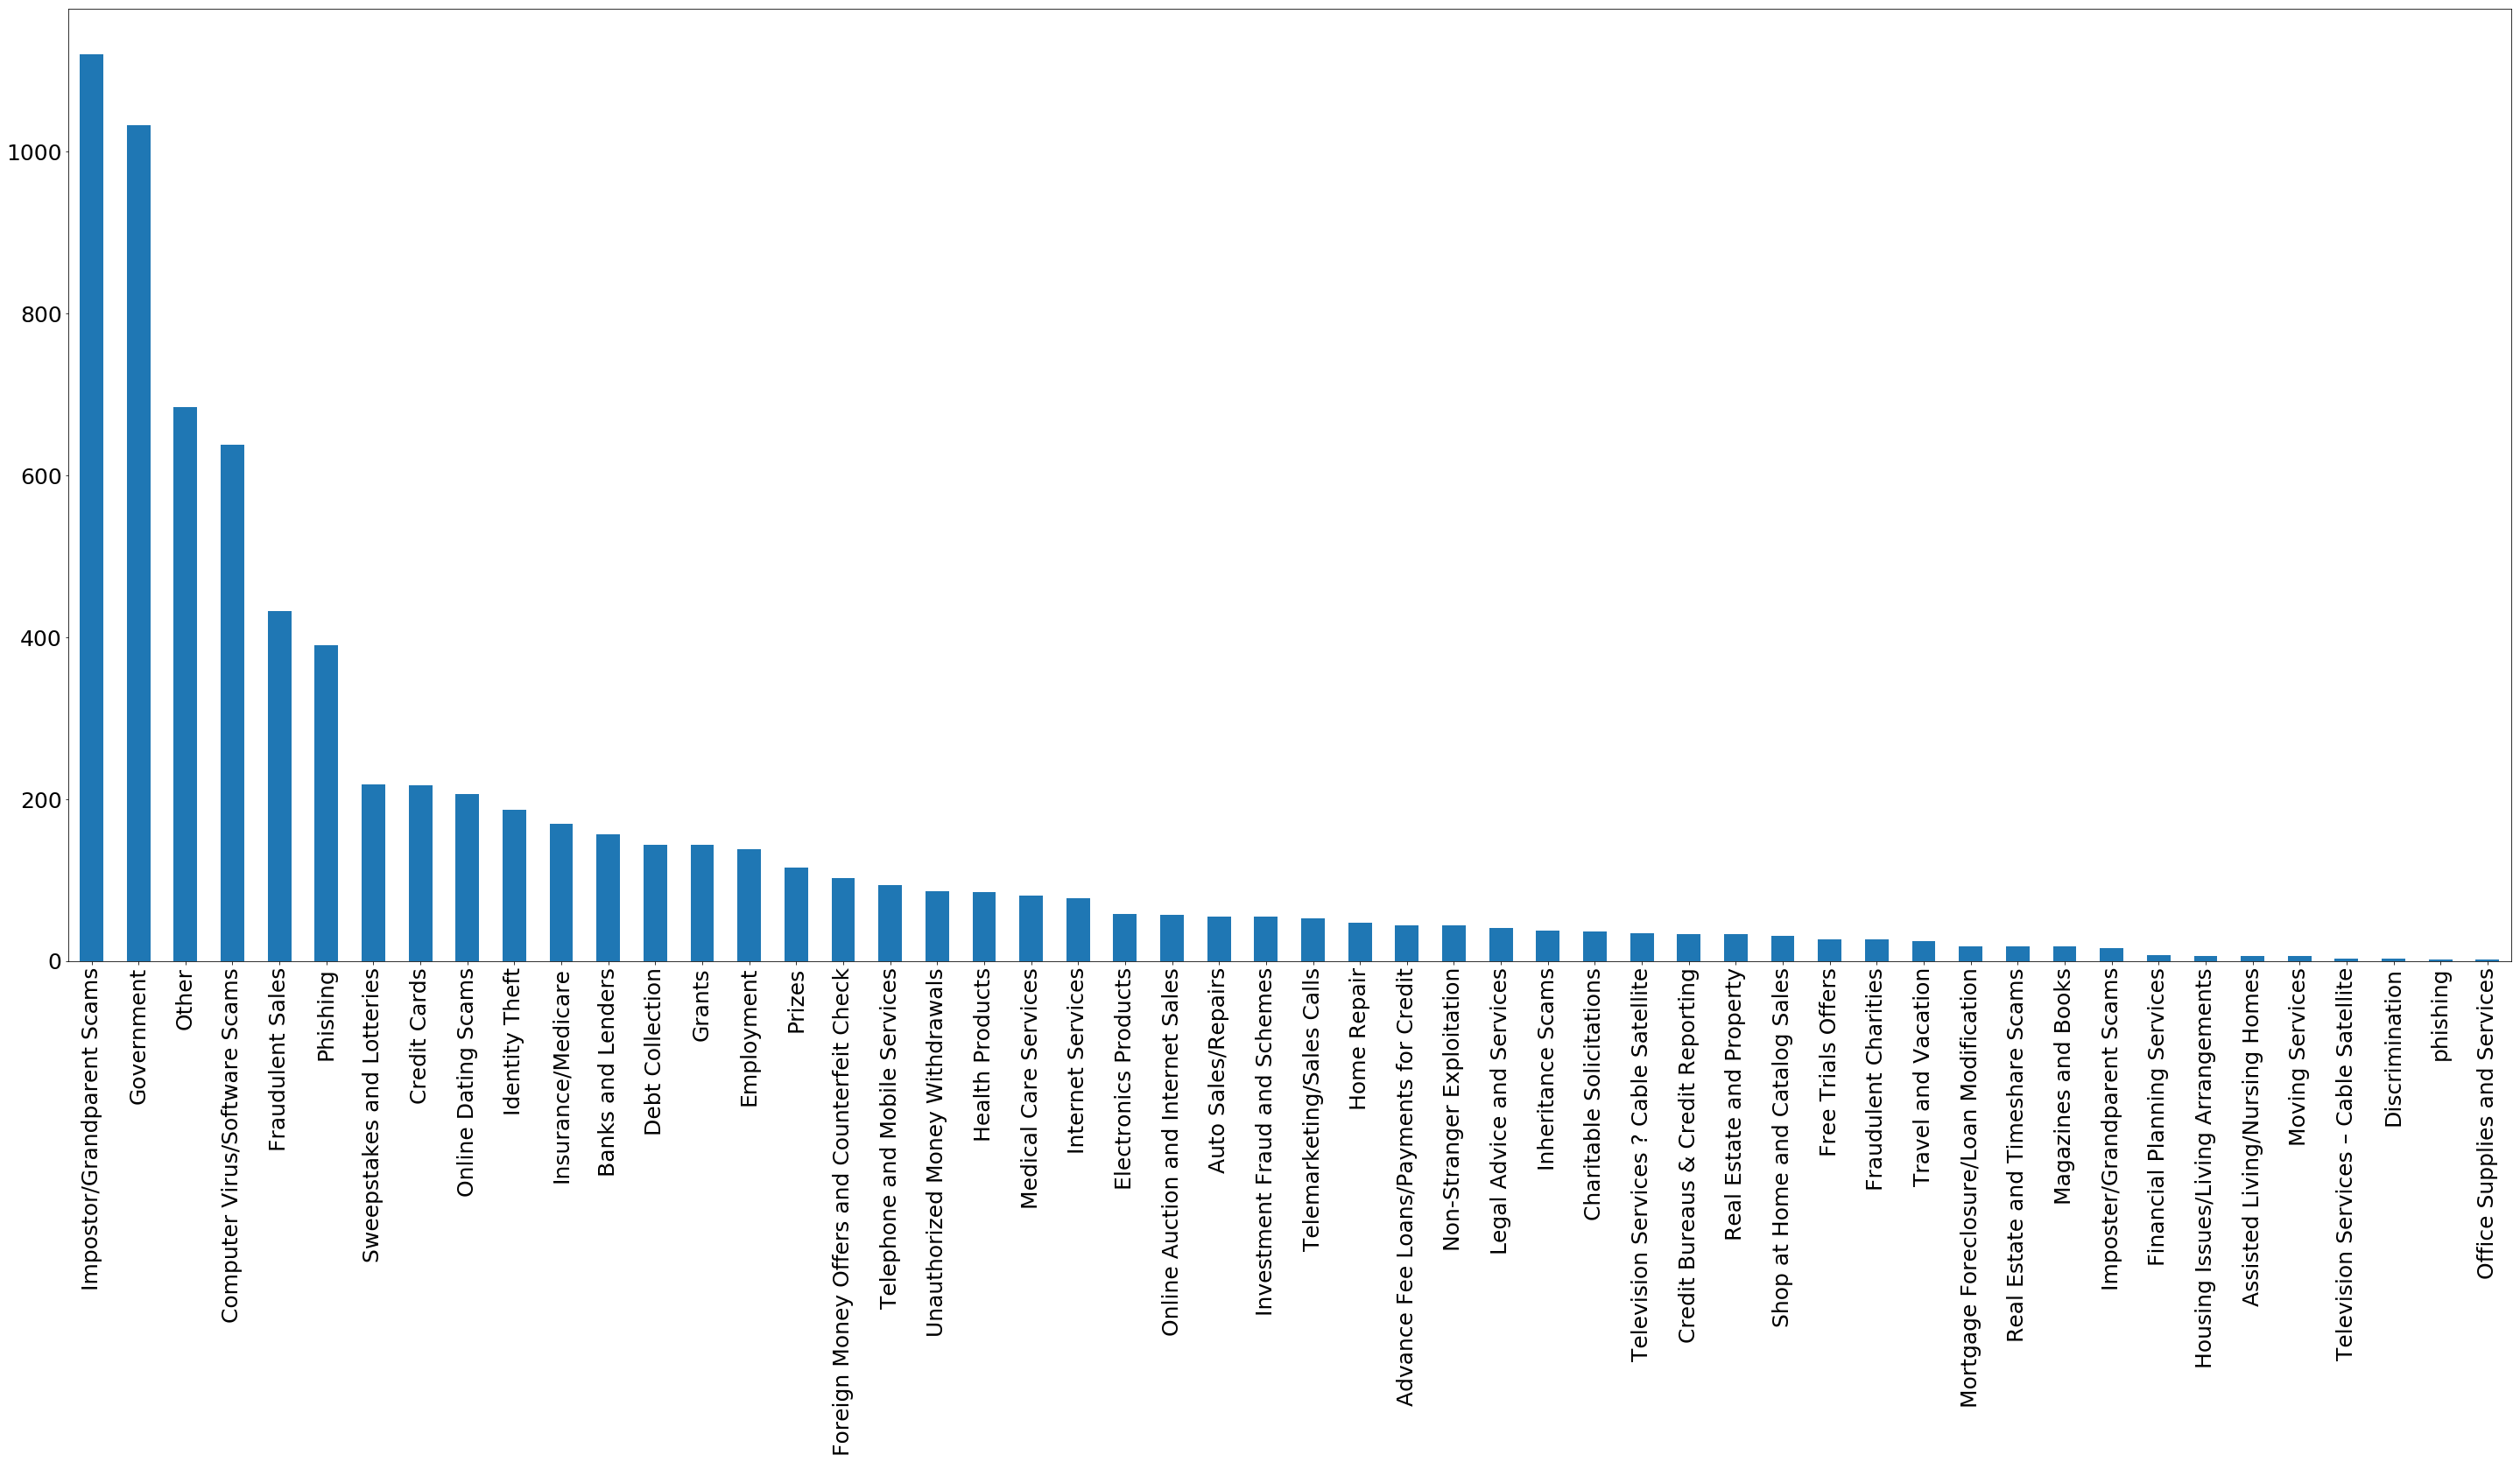

In [12]:
# Plotting a bar graph depicting the most frequently occuring scam types from the top 20 scam types with their count
scampydf['Scam Type'].value_counts().plot(kind='bar')

In [13]:
#Data Preprocessing and Text Cleaning
import re
import numpy as np
scampydf['Scam Description'] = scampydf['Scam Description'].replace('\r\n','', regex=True)
scampydf['Scam Description'] = scampydf['Scam Description'].str.lstrip()
scampydf['Scam Description'] = scampydf['Scam Description'].str.rstrip()
bad_characters = ["/", "\\", ":", "(", ")", "<", ">", "|", "?", "*" , "\n", ".", "#", "$" , "%", "#", "@" ]
clean_descriptions=[]

for row in scampydf['Scam Description'] :
  row.rstrip('.')
  row.replace('?', '')
  row.capitalize()
  re.sub(r'^$\n+', '', row , flags=re.MULTILINE)
  re.sub(r'^\n+', '', row , flags=re.MULTILINE)
  if row.startswith(tuple(bad_characters)):
    row = row.replace(row,str(np.nan))
    clean_descriptions.append(row)
  else:
    clean_descriptions.append(row)
scampydf['Scam Description'] = clean_descriptions
scampydf.dropna()

for char in bad_characters:
  scampydf['Scam Description'] = scampydf['Scam Description'].str.replace(char,"")


In [14]:
#dropping all the nans, nones and null values 
scampydf = scampydf.mask(scampydf.eq(None)).dropna()
scampydf['Scam Type'].unique()

Out[14]: array(['Government', 'Medical Care Services', 'Other',
 'Legal Advice and Services', 'Internet Services', 'Employment',
 'Sweepstakes and Lotteries', 'Fraudulent Sales',
 'Computer Virus/Software Scams', 'Impostor/Grandparent Scams',
 'Real Estate and Property', 'Online Dating Scams',
 'Debt Collection', 'Identity Theft', 'Insurance/Medicare',
 'Phishing', 'Prizes', 'Grants',
 'Online Auction and Internet Sales',
 'Unauthorized Money Withdrawals', 'Magazines and Books',
 'Telephone and Mobile Services', 'Charitable Solicitations',
 'Credit Cards', 'Electronics Products',
 'Advance Fee Loans/Payments for Credit',
 'Credit Bureaus & Credit Reporting', 'Non-Stranger Exploitation',
 'Travel and Vacation', 'Health Products', 'Banks and Lenders',
 'Inheritance Scams', 'Free Trials Offers', 'Auto Sales/Repairs',
 'Home Repair', 'Television Services ? Cable Satellite',
 'Foreign Money Offers and Counterfeit Check',
 'Shop at Home and Catalog Sales',
 'Mortgage Foreclosure/Loan Modification',
 'Housing Issues/Living Arrangements', 'Fraudulent Charities',
 'Telemarketing/Sales Calls', 'Investment Fraud and Schemes',
 'Real Estate and Timeshare Scams', 'Office Supplies and Services',
 'Moving Services', 'Assisted Living/Nursing Homes',
 'Financial Planning Services', 'phishing',
 'Imposter/Grandparent Scams',
 'Television Services – Cable Satellite', 'Discrimination'],
 dtype=object)

In [15]:
#Data Cleaning and Text Preprocessing
import re
import numpy as np
scampydf['Scam Type'] = scampydf['Scam Type'].replace('\r\n','', regex=True)

scampydf['Scam Type'] = scampydf['Scam Type'].str.lstrip()
scampydf['Scam Type'] = scampydf['Scam Type'].str.rstrip()

bad_characters = ["/", "\\", ":", "(", ")", "<", ">", "|", "?", "*" , "\n", ".", "#", "$" , "%", "#", "@" ]
clean_descriptions=[]

for row in scampydf['Scam Type'] :
  row.rstrip('.')
  row.replace('?', '')
  row.capitalize()
  re.sub(r'^$\n+', '', row , flags=re.MULTILINE)
  re.sub(r'^\n+', '', row , flags=re.MULTILINE)
  if row.startswith(tuple(bad_characters)):
    row = row.replace(row,str(np.nan))
    clean_descriptions.append(row)
  else:
    clean_descriptions.append(row)
scampydf['Scam Type'] = clean_descriptions
scampydf.dropna()

for char in bad_characters:
  scampydf['Scam Type'] = scampydf['Scam Type'].str.replace(char,"")

In [16]:
#Checking the no of rows after dropping nones
len(scampydf['Scam Type'])

Out[16]: 7360

In [17]:
import nltk
import string
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.stem.porter import PorterStemmer
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data] Unzipping tokenizers/punkt.zip.
Out[17]: True

In [18]:
#Removing stopwords from scam description
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop = stopwords.words('english')
#scampydf['New Scam Description'] = scampydf['Scam Description'].apply(lambda x: [item for item in x if item not in stop])
#scampydf
scampydf['desc_without_stopwords'] = scampydf['Scam Description'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
scampydf.head()

,Scam Description,Scam Type,desc_without_stopwords
0,1800 called to connect me with a social securi...,Government,1800 called connect social security officer A ...
1,A with Caller ID showing Ascension my doctor i...,Medical Care Services,A Caller ID showing Ascension doctor affiliate...
2,"I want to know a comander of us army in Siria,...",Other,"I want know comander us army Siria, write sinc..."
3,I was not at home I had a message waiting Th...,Government,I home I message waiting The FBI mentioned sai...
4,"""Lawyer ""called to say our son had caused a se...",Legal Advice and Services,"""Lawyer ""called say son caused serious car acc..."


In [19]:
#Cleaning the text further by retaining words with length >= 4 in the scam description
scampydf['desc_without_stopwords_new'] = scampydf['desc_without_stopwords'].str.findall('\w{4,}').str.join(' ')
scampydf.head()

,Scam Description,Scam Type,desc_without_stopwords,desc_without_stopwords_new
0,1800 called to connect me with a social securi...,Government,1800 called connect social security officer A ...,1800 called connect social security officer ac...
1,A with Caller ID showing Ascension my doctor i...,Medical Care Services,A Caller ID showing Ascension doctor affiliate...,Caller showing Ascension doctor affiliated Asc...
2,"I want to know a comander of us army in Siria,...",Other,"I want know comander us army Siria, write sinc...",want know comander army Siria write since dosi...
3,I was not at home I had a message waiting Th...,Government,I home I message waiting The FBI mentioned sai...,home message waiting mentioned said call back ...
4,"""Lawyer ""called to say our son had caused a se...",Legal Advice and Services,"""Lawyer ""called say son caused serious car acc...",Lawyer called caused serious accident also inj...


In [20]:
#Algorithm for calculating the accuracy
def _reciprocal_rank(true_labels: list, machine_preds: list):
    """Compute the reciprocal rank at cutoff k"""
    
    # add index to list only if machine predicted label exists in true labels
    tp_pos_list = [(idx + 1) for idx, r in enumerate(machine_preds) if r in true_labels]

    rr = 0
    if len(tp_pos_list) > 0:
        # for RR we need position of first correct item
        first_pos_list = tp_pos_list[0]
        
        # rr = 1/rank
        rr = 1 / float(first_pos_list)

    return rr

def compute_mrr_at_k(items:list):
    """Compute the MRR(Mean Reciprocal Rank/Average Reciprocal Rank) at cutoff k"""
    rr_total = 0
    
    for item in items:   
        rr_at_k = _reciprocal_rank(item[0],item[1])
        rr_total = rr_total + rr_at_k
        mrr = rr_total / 1/float(len(items))

    return mrr

def collect_preds(Y_test,Y_preds):
    """Collect all predictions and ground truth"""
    
    pred_gold_list=[[[Y_test[idx]],pred] for idx,pred in enumerate(Y_preds)]
    return pred_gold_list
             
def compute_accuracy(eval_items:list):
    correct=0
    total=0
    
    for item in eval_items:
        true_pred=item[0]
        machine_pred=set(item[1])
        
        for cat in true_pred:
            if cat in machine_pred:
                correct+=1
                break
    
    
    accuracy=correct/float(len(eval_items))
    return accuracy

In [21]:
#Calculating the precision call and implementing feature engineering
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

import numpy as np
import logging

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

def extract_features(df,field,training_data,testing_data,type):
    """Extract features using different methods"""
    
    logging.info("Extracting features and creating vocabulary...")
    
    if "binary" in type:
        
        # BINARY FEATURE REPRESENTATION
        cv= CountVectorizer(binary=True, max_df=0.95)
        cv.fit_transform(training_data[field].values)
        
        train_feature_set=cv.transform(training_data[field].values)
        test_feature_set=cv.transform(testing_data[field].values)
        
        return train_feature_set,test_feature_set,cv
  
    elif "counts" in type:
        
        # COUNT BASED FEATURE REPRESENTATION
        cv= CountVectorizer(binary=False, max_df=0.95)
        cv.fit_transform(training_data[field].values)
        
        train_feature_set=cv.transform(training_data[field].values)
        test_feature_set=cv.transform(testing_data[field].values)
        
        return train_feature_set,test_feature_set,cv
    
    else:    
        
        # TF-IDF BASED FEATURE REPRESENTATION
        tfidf_vectorizer=TfidfVectorizer(use_idf=True, max_df=0.95)
        tfidf_vectorizer.fit_transform(training_data[field].values)
        
        train_feature_set=tfidf_vectorizer.transform(training_data[field].values)
        test_feature_set=tfidf_vectorizer.transform(testing_data[field].values)
        
        return train_feature_set,test_feature_set,tfidf_vectorizer

def get_top_k_predictions(model,X_test,k):
    
    # get probabilities instead of predicted labels, since we want to collect top 3
    probs = model.predict_proba(X_test)

    # GET TOP K PREDICTIONS BY PROB - note these are just index
    best_n = np.argsort(probs, axis=1)[:,-k:]
    
    # GET CATEGORY OF PREDICTIONS
    preds=[[model.classes_[predicted_cat] for predicted_cat in prediction] for prediction in best_n]
    
    preds=[ item[::-1] for item in preds]
    
    return preds
   
    
def train_model(df,field="text_desc",feature_rep="binary",top_k=3):
    
    logging.info("Starting model training...")
    
    # GET A TRAIN TEST SPLIT (set seed for consistent results)
    training_data, testing_data = train_test_split(df,random_state = 2000,)

    # GET LABELS
    Y_train=training_data['Scam Type'].values
    Y_test=testing_data['Scam Type'].values
     
    # GET FEATURES
    X_train,X_test,feature_transformer=extract_features(df,field,training_data,testing_data,type=feature_rep)

    # INIT LOGISTIC REGRESSION CLASSIFIER
    logging.info("Training a Logistic Regression Model...")
    scikit_log_reg = LogisticRegression(verbose=1, solver='liblinear',random_state=0, C=5, penalty='l2',max_iter=1000)
    model=scikit_log_reg.fit(X_train,Y_train)

    # GET TOP K PREDICTIONS
    preds=get_top_k_predictions(model,X_test,top_k)
    
    # GET PREDICTED VALUES AND GROUND TRUTH INTO A LIST OF LISTS - for ease of evaluation
    eval_items=collect_preds(Y_test,preds)
    
    # GET EVALUATION NUMBERS ON TEST SET -- HOW DID WE DO?
    logging.info("Starting evaluation...")
    accuracy=compute_accuracy(eval_items)
    mrr_at_k=compute_mrr_at_k(eval_items)
    
    logging.info("Done training and evaluation.")
    
    return model,feature_transformer,accuracy,mrr_at_k


2020-08-06 21:37:26,350 : INFO : Received command c on object id p0
2020-08-06 21:37:26,350 : INFO : Received command c on object id p0
2020-08-06 21:37:26,350 : INFO : Received command c on object id p0
2020-08-06 21:37:26,351 : INFO : Received command c on object id p0
2020-08-06 21:37:26,351 : INFO : Received command c on object id p0
2020-08-06 21:37:26,351 : INFO : Received command c on object id p0
2020-08-06 21:37:26,351 : INFO : Received command c on object id p0
2020-08-06 21:37:26,352 : INFO : Received command c on object id p0

In [22]:
#Running LR with tfidf as the feature
field='desc_without_stopwords_new'
feature_rep='tfidf'
top_k=10

model,transformer,accuracy,mrr_at_k=train_model(scampydf,field=field,feature_rep=feature_rep,top_k=top_k)
print("\nAccuracy={0}; MRR={1}".format(accuracy,mrr_at_k))

2020-08-06 21:37:26,400 : INFO : Starting model training...
2020-08-06 21:37:26,403 : INFO : Extracting features and creating vocabulary...
2020-08-06 21:37:26,798 : INFO : Training a Logistic Regression Model...
/databricks/python/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
 "this warning.", FutureWarning)
[LibLinear]2020-08-06 21:37:27,399 : INFO : Received command c on object id p0
2020-08-06 21:37:27,400 : INFO : Received command c on object id p0
2020-08-06 21:37:27,400 : INFO : Received command c on object id p0
2020-08-06 21:37:27,401 : INFO : Received command c on object id p0
2020-08-06 21:37:27,401 : INFO : Received command c on object id p0
2020-08-06 21:37:27,402 : INFO : Received command c on object id p0
2020-08-06 21:37:27,402 : INFO : Received command c on object id p0
2020-08-06 21:37:27,403 : INFO : Received command c on object id p0
2020-08-06 21:37:27,499 : INFO : Received command c on object id p0
2020-08-06 21:37:27,600 : INFO : Received command c on object id p0
2020-08-06 21:37:27,701 : INFO : Received command c on object id p0
2020-08-06 21:37:27,773 : INFO : Received command c on object id p0
2020-08-06 21:37:27,773 : INFO : Received command c on object id p0
2020-08-06 21:37:27,773 : INFO : Received command c on object id p0
2020-08-06 21:37:27,774 : INFO : Received command c on object id p0
2020-08-06 21:37:27,774 : INFO : Received command c on object id p0
2020-08-06 21:37:27,775 : INFO : Received command c on object id p0
2020-08-06 21:37:27,775 : INFO : Received command c on object id p0
2020-08-06 21:37:27,775 : INFO : Received command c on object id p0
2020-08-06 21:37:27,801 : INFO : Received command c on object id p0
2020-08-06 21:37:27,902 : INFO : Received command c on object id p0
2020-08-06 21:37:28,002 : INFO : Received command c on object id p0
2020-08-06 21:37:28,103 : INFO : Received command c on object id p0
2020-08-06 21:37:28,204 : INFO : Received command c on object id p0
2020-08-06 21:37:28,278 : INFO : Received command c on object id p0
2020-08-06 21:37:28,279 : INFO : Received command c on object id p0
2020-08-06 21:37:28,279 : INFO : Received command c on object id p0
2020-08-06 21:37:28,280 : INFO : Received command c on object id p0
2020-08-06 21:37:28,280 : INFO : Received command c on object id p0
2020-08-06 21:37:28,280 : INFO : Received command c on object id p0
2020-08-06 21:37:28,281 : INFO : Received command c on object id p0
2020-08-06 21:37:28,281 : INFO : Received command c on object id p0
2020-08-06 21:37:28,304 : INFO : Received command c on object id p0
2020-08-06 21:37:28,405 : INFO : Received command c on object id p0
2020-08-06 21:37:28,506 : INFO : Received command c on object id p0
2020-08-06 21:37:28,606 : INFO : Received command c on object id p0
2020-08-06 21:37:28,707 : INFO : Received command c on object id p0
2020-08-06 21:37:28,777 : INFO : Received command c on object id p0
2020-08-06 21:37:28,777 : INFO : Received command c on object id p0
2020-08-06 21:37:28,778 : INFO : Received command c on object id p0
2020-08-06 21:37:28,778 : INFO : Received command c on object id p0
2020-08-06 21:37:28,779 : INFO : Received command c on object id p0
2020-08-06 21:37:28,779 : INFO : Received command c on object id p0
2020-08-06 21:37:28,779 : INFO : Received command c on object id p0
2020-08-06 21:37:28,780 : INFO : Received command c on object id p0
2020-08-06 21:37:28,807 : INFO : Received command c on object id p0
2020-08-06 21:37:28,908 : INFO : Received command c on object id p0
2020-08-06 21:37:29,009 : INFO : Received command c on object id p0
2020-08-06 21:37:29,109 : INFO : Received command c on object id p0
2020-08-06 21:37:29,210 : INFO : Received command c on object id p0
2020-08-06 21:37:29,279 : INFO : Received command c on object id p0
2020-08-06 21:37:29,279 : INFO : Received command c on object id

In [23]:
#Importing the call center data which is the testing data, to predict the scam types using the above LR model
# File location and type   
file_location_trial = "/FileStore/tables/unlabelled_call_centre_data-1.csv"
#file_location_trial = "/FileStore/tables/Call_centre_scams_desc_csv.csv"
file_type = "csv"
# CSV options
infer_schema = "true"
first_row_is_header = "true"
delimiter = ","
multi_line = "true"

# The applied options are for CSV files. For other file types, these will be ignored.
df_trial = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .option("multiLine", multi_line) \
  .option("escape", "\"") \
  .load(file_location_trial)

#Displaying the loaded spark dataframe
display(df_trial)


trial_df = df_trial.toPandas()
print(trial_df.columns)
trial_df.head


Create Date Time,Scam_desc
05/2020,Received a request to send gift cards
05/2020,someone texted her about a position on craigslist she didnt provide them her phone number she is concerned its a scam she wanted to share this with fwn
05/2020,"Reporting caller received call from her friend who had said she sent them $1,000 to get the $150,000, the phone Number it came from is 217-730-7171. She spoke to him. They asked her if she had a Cash App to Send the Money."
05/2020,Receiving multiple calls claiming the consumer has been approved for a loan with request to call back for assistance.
05/2020,"Sweepstakes scam-recvd message from someone claiming they won PCH, additional number provided:5162008331"
05/2020,"Wanted to know her name, phone number, and if she was having a problem with google. cb 8665030568"
05/2020,receiving calls on voicemail claiming that her social security number has been associated with criminal activity and will come and arrest it she does not call back
05/2020,Government impersonator SSA-recvd message from someone claiming to be ssa
05/2020,Received 2 robocalls in a matter of minutes and here is the second number 502-591-7821
05/2020,Message said her mother was going to be arrested for fraud. She gave no information.


In [24]:
#---------------------------------CLEANING THE CALL CENTER DATA----------------------------------------
# File location and type
file_location = "/FileStore/tables/FraudWatchNetworkExport_5_15_2020_19_30.csv"
file_type = "csv"

# CSV options
infer_schema = "true"
first_row_is_header = "true"
delimiter = ","
multi_line = "true"

# The applied options are for CSV files. For other file types, these will be ignored.
df_call = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .option("multiLine", multi_line) \
  .option("escape", "\"") \
  .load(file_location)

display(df_call)

Case Number,Case Type,Create Date Time,Account Number,Primary Person ID,Primary Person Name,Secondary Person ID,Secondary Person Name,Contact Name,Age,Gender,Full Address,Contact Phone Number,Contact Email Address,Preferred Contact Method,Preferred Contact Time,Description,What type of scam is this?,Who are they claiming to be?,How were you contacted?,Scammer's Phone Number,Scammer's Email,Scammer's address,Estimated Amount of Loss,How did you pay?,Advice and/or resources given,Notes - Comments
126672751,Fraud Watch Network_NonVictim,2020-05-15T05:38:31.020+0000,,,,,,na,,,na,na,na,Phone,,dating site,Other,Clarissa Rico,Internet/Email,801-610-9266,,,,,"AARP FWN resources , report to Tinder",Received a request to send gift cards
126672602,Fraud Watch Network_NonVictim,2020-05-15T05:39:56.417+0000,,,,,,unknown,,,,8032602452,,Phone,,Used to report a fraud or scam where the person did NOT fall victim. The information collected will be shared with the FTC and other agencies as...,Imposters: Government,Theresa Smith,Phone,2818428395,tonymith56@yahoo.com,,,,avoid communication,someone texted her about a position on craigslist she didnt provide them her phone number she is concerned its a scam she wanted to share this with fwn
126672555,Fraud Watch Network_NonVictim,2020-05-15T05:44:35.453+0000,,,,,,NA,,,NA,NA,NA,Phone,,"Reporting caller received call from her friend who had said she sent them $1,000",Imposters: Government,Government Grant,Internet/Email,217-730-7171,,,,,"FWN Website, Don’t pay a fee to a company that says it will help you find grants. You can check directly with government agencies about grant opportunities, for free. stop all communication, report to Facebook, block the friend, do not have any other communications with this person, www.ic3.gov/","Reporting caller received call from her friend who had said she sent them $1,000 to get the $150,000, the phone Number it came from is 217-730-7171. She spoke to him. They asked her if she had a Cash App to Send the Money."
126672752,Fraud Watch Network_NonVictim,2020-05-15T05:56:20.097+0000,,,,,,na,,,na,na,na,Phone,,loan,Imposters: Business,Lending Club,Phone,940-215-6003,,,,,AARP FWN resources and to check credit report.,Receiving multiple calls claiming the consumer has been approved for a loan with request to call back for assistance.
126673051,Fraud Watch Network_NonVictim,2020-05-15T06:34:05.200+0000,,,,,,not provided,,,,7657023743,,Phone,,Used to report a fraud or scam where the person did NOT fall victim. The information collected will be shared with the FTC and other agencies as...,Sweepstakes/Lottery,PCH,Phone,5164419780,,,,,provided PCH number and guidelines,"Sweepstakes scam-recvd message from someone claiming they won PCH, additional number provided:5162008331"
126672804,Fraud Watch Network_NonVictim,2020-05-15T06:57:41.037+0000,,,,,,na,,,,na,,Phone,,"Wanted to know her name, phone number, and if she was having a problem with google. cb 8665030568",Imposters: Business,Google,Phone,8665030568,,,,,Reported attempted phishing scam,"Wanted to know her name, phone number, and if she was having a problem with google. cb 8665030568"
126673101,Fraud Watch Network_NonVictim,2020-05-15T06:52:17.683+0000,,,,,,Janet,,,"Nevada, 89429",,,Phone,,Social Security Scam,Imposters: Government,UNKNOWN,Phone,2405831588,,,,,Advised to go to aarp.org/fraudwatchnetwork to learn more and check out the scam map,receiving calls on voicemail claiming that her social security number has been associated with criminal activity and will come and arrest it she does not call back
126673054,Fraud Watch Network_NonVictim,2020-05-15T07:14:24.680+0000,,,,,,not provided,,,,8165508690,,Phone,,Used to report a fraud or scam where the person did NOT fall victim. The information collected will be shared with the FTC and other agencies as...,Imposters: Government,ssa,Phone,9183801134,,,,,provided scam/robo blockers,Government impersonator SSA-recvd message from someone claiming to be ssa
126672953,Fraud Wa

In [25]:
#pandas dataframe for call center data 
call_frame = df_call.toPandas()
call_frame.shape

Out[69]: (204, 27)2020-08-06 21:42:05,000 : INFO : Received command c on object id p0
2020-08-06 21:42:05,000 : INFO : Received command c on object id p0
2020-08-06 21:42:05,000 : INFO : Received command c on object id p0
2020-08-06 21:42:05,001 : INFO : Received command c on object id p0
2020-08-06 21:42:05,001 : INFO : Received command c on object id p0
2020-08-06 21:42:05,002 : INFO : Received command c on object id p0
2020-08-06 21:42:05,002 : INFO : Received command c on object id p0
2020-08-06 21:42:05,002 : INFO : Received command c on object id p0

In [26]:
#CHOOSING THE REQD COLS FROM CALL CENTER DATA
required_cols = call_frame[['Case Number', 'Notes - Comments', ' Estimated Amount of Loss', ' Create Date Time', ' Full Address', ' What type of scam is this?', 'How were you contacted?']]
required_cols.head()

,Case Number,Notes - Comments,Estimated Amount of Loss,Create Date Time,Full Address,What type of scam is this?,How were you contacted?
0,126672751,Received a request to send gift cards,,2020-05-15 05:38:31.020,na,Other,Internet/Email
1,126672602,someone texted her about a position on craigslist she didnt provide them her phone number she is concerned its a scam she wanted to share this with fwn,,2020-05-15 05:39:56.417,,Imposters: Government,Phone
2,126672555,"Reporting caller received call from her friend who had said she sent them $1,000 to get the $150,000, the phone Number it came from is 217-730-7171. She spoke to him. \nThey asked her if she had a Cash App to Send the Money.",,2020-05-15 05:44:35.453,NA,Imposters: Government,Internet/Email
3,126672752,Receiving multiple calls claiming the consumer has been approved for a loan with request to call back for assistance.,,2020-05-15 05:56:20.097,na,Imposters: Business,Phone
4,126673051,"Sweepstakes scam-recvd message from someone claiming they won PCH, additional number provided:5162008331",,2020-05-15 06:34:05.200,,Sweepstakes/Lottery,Phone


In [27]:
# cleaning the dataframe 
missing_values= ['na', 'NA', ' ', '  ', 'n/a' , ' na', '0']
required_cols = required_cols.fillna(0)
required_cols[' Estimated Amount of Loss'] = required_cols[' Estimated Amount of Loss'].replace(missing_values, 'NaN')
required_cols[' Full Address'] = required_cols[' Full Address'].replace(missing_values, 'NaN')

#extracting zip code information from address field 
all_zip =[]
for i in required_cols[' Full Address']:
    if str(i) == 'NaN':
        all_zip.append('NaN')
    else:
        zip = i.split(',')
        zip_code = (zip[-2][1:6])
        all_zip.append(zip_code)
        
required_cols[' Full Address'] = all_zip

2020-08-06 21:48:55,478 : INFO : Received command c on object id p0
2020-08-06 21:48:55,481 : INFO : Received command c on object id p0
2020-08-06 21:48:55,481 : INFO : Received command c on object id p0
2020-08-06 21:48:55,482 : INFO : Received command c on object id p0
2020-08-06 21:48:55,482 : INFO : Received command c on object id p0
2020-08-06 21:48:55,482 : INFO : Received command c on object id p0
2020-08-06 21:48:55,482 : INFO : Received command c on object id p0
2020-08-06 21:48:55,483 : INFO : Received command c on object id p0
2020-08-06 21:48:55,483 : INFO : Received command c on object id p0
2020-08-06 21:48:55,484 : INFO : Received command c on object id p0
2020-08-06 21:48:55,484 : INFO : Received command c on object id p0
2020-08-06 21:48:55,485 : INFO : Received command c on object id p0
2020-08-06 21:48:55,485 : INFO : Received command c on object id p0
2020-08-06 21:48:55,485 : INFO : Received command c on object id p0
2020-08-06 21:48:55,486 : INFO : Received command c on object id p0
2020-08-06 21:48:55,486 : INFO : Received command c on object id p0

In [28]:
import pandas as pd 
pd.to_numeric(required_cols[' Estimated Amount of Loss'], errors ='coerce')

Out[80]: 0 NaN 
1 NaN 
2 NaN 
3 NaN 
4 NaN 
5 NaN 
6 NaN 
7 NaN 
8 NaN 
9 NaN 
10 NaN 
11 NaN 
12 NaN 
13 NaN 
14 NaN 
15 NaN 
16 NaN 
17 NaN 
18 NaN 
19 NaN 
20 NaN 
21 NaN 
22 NaN 
23 NaN 
24 NaN 
25 NaN 
26 NaN 
27 NaN 
28 NaN 
29 NaN 
30 NaN 
31 NaN 
32 NaN 
33 NaN 
34 NaN 
35 NaN 
36 NaN 
37 NaN 
38 NaN 
39 NaN 
40 NaN 
41 NaN 
42 NaN 
43 NaN 
44 NaN 
45 NaN 
46 NaN 
47 NaN 
48 NaN 
49 NaN 
50 NaN 
51 NaN 
52 NaN 
53 NaN 
54 NaN 
55 NaN 
56 NaN 
57 NaN 
58 NaN 
59 NaN 
60 NaN 
61 NaN 
62 NaN 
63 NaN 
64 NaN 
65 NaN 
66 NaN 
67 NaN 
68 NaN 
69 NaN 
70 NaN 
71 NaN 
72 NaN 
73 NaN 
74 NaN 
75 NaN 
76 NaN 
77 NaN 
78 NaN 
79 NaN 
80 NaN 
81 NaN 
82 NaN 
83 NaN 
84 NaN 
85 NaN 
86 NaN 
87 NaN 
88 NaN 
89 NaN 
90 NaN 
91 NaN 
92 NaN 
93 NaN 
94 NaN 
95 NaN 
96 NaN 
97 NaN 
98 NaN 
99 NaN 
100 NaN 
101 NaN 
102 NaN 
103 NaN 
104 3000.0
105 NaN 
106 NaN 
107 NaN 
108 NaN 
109 NaN 
110 40.0 
111 0.0 
112 NaN 
113 NaN 
114 0.0 
115 NaN 
116 NaN 
117 NaN 
118 NaN 
119 NaN 
120 NaN 
121 NaN 
122 NaN 
123 NaN 
124 NaN 
125 NaN 
126 NaN 
127 NaN 
128 NaN 
129 NaN 
130 NaN 
131 NaN 
132 NaN 
133 0.0 
134 NaN 
135 NaN 
136 NaN 
137 NaN 
138 NaN 
139 NaN 
140 NaN 
141 NaN 
142 NaN 
143 NaN 
144 NaN 
145 NaN 
146 NaN 
147 NaN 
148 NaN 
149 NaN 
150 NaN 
151 NaN 
152 NaN 
153 NaN 
154 NaN 
155 149.0 
156 NaN 
157 NaN 
158 NaN 
159 NaN 
160 NaN 
161 NaN 
162 NaN 
163 NaN 
164 NaN 
165 NaN 
166 NaN 
167 NaN 
168 NaN 
169 NaN 
170 NaN 
171 NaN 
172 4254.0
173 NaN 
174 NaN 
175 NaN 
176 NaN 
177 NaN 
178 NaN 
179 NaN 
180 NaN 
181 NaN 
182 NaN 
183 NaN 
184 NaN 
185 NaN 
186 NaN 
187 NaN 
188 NaN 
189 NaN 
190 NaN 
191 NaN 
192 NaN 
193 NaN 
194 NaN 
195 NaN 
196 NaN 
197 NaN 
198 NaN 
199 NaN 
200 NaN 
201 NaN 
202 NaN 
203 NaN 
Name: Estimated Amount of Loss, dtype: float642020-08-06 21:48:57,128 : INFO : Received command c on object id p0
2020-08-06 21:48:57,128 : INFO : Received command c on object id p0
2020-08-06 21:48:57,129 : INFO : Received command c on object id p0
2020-08-06 21:48:57,129 : INFO : Received command c on object id p0
2020-08-06 21:48:57,129 : INFO : Received command c on object id p0
2020-08-06 21:48:57,130 : INFO : Received command c on object id p0
2020-08-06 21:48:57,130 : INFO : Received command c on object id p0
2020-08-06 21:48:57,130 : INFO : Received command c on object id p0

In [29]:
#amount lost
amount_list=[]
for amt in required_cols[' Estimated Amount of Loss']:
    if amt =='NaN':
        amt_actual = 'NaN'
        amount_list.append(amt_actual)

    elif str(amt).startswith('$') :
            amt_actual = amt.strip('$')
            amount_list.append(amt_actual)
    else:
        amount_list.append(amt)
        
print(len(amount_list))
final_val =[]
for var in amount_list:
        var = str(var).strip()
        var = var.replace(')','')
        if var == 'NaN':
            final_val.append('NaN')
        else:
            var1 = var.replace(',','')
            var1 = var.replace(' ','')
            var1 = var.replace('  ','')
            
            if var1.isnumeric():
              if 0< float(var1) <100:
                  final_val.append('0-100')
              elif 101< float(var1) <500:
                  final_val.append('101-500')
              elif 501< float(var1) <1000:
                  final_val.append('501-1000')
              elif 1001< float(var1)<5000:
                  final_val.append('1001-5000')
              elif  5000< float(var1):
                  final_val.append('5000+')
              else:
                  final_val.append(var1)
            else:
              final_val.append('NaN') 
required_cols['Amount lost'] = final_val
required_cols['Amount lost'] 


204
Out[81]: 0 NaN 
1 NaN 
2 NaN 
3 NaN 
4 NaN 
5 NaN 
6 NaN 
7 NaN 
8 NaN 
9 NaN 
10 NaN 
11 NaN 
12 NaN 
13 NaN 
14 NaN 
15 NaN 
16 NaN 
17 NaN 
18 NaN 
19 NaN 
20 NaN 
21 NaN 
22 NaN 
23 NaN 
24 NaN 
25 NaN 
26 NaN 
27 NaN 
28 NaN 
29 NaN 
30 NaN 
31 NaN 
32 NaN 
33 NaN 
34 NaN 
35 NaN 
36 NaN 
37 NaN 
38 NaN 
39 NaN 
40 NaN 
41 NaN 
42 NaN 
43 NaN 
44 NaN 
45 NaN 
46 NaN 
47 NaN 
48 NaN 
49 NaN 
50 NaN 
51 NaN 
52 NaN 
53 NaN 
54 NaN 
55 NaN 
56 NaN 
57 NaN 
58 NaN 
59 NaN 
60 NaN 
61 NaN 
62 NaN 
63 NaN 
64 NaN 
65 NaN 
66 NaN 
67 NaN 
68 NaN 
69 NaN 
70 NaN 
71 NaN 
72 NaN 
73 NaN 
74 NaN 
75 NaN 
76 NaN 
77 NaN 
78 NaN 
79 NaN 
80 NaN 
81 NaN 
82 NaN 
83 NaN 
84 NaN 
85 NaN 
86 NaN 
87 NaN 
88 NaN 
89 NaN 
90 NaN 
91 NaN 
92 NaN 
93 NaN 
94 NaN 
95 NaN 
96 NaN 
97 NaN 
98 NaN 
99 NaN 
100 NaN 
101 NaN 
102 NaN 
103 NaN 
104 1001-5000
105 NaN 
106 NaN 
107 NaN 
108 NaN 
109 NaN 
110 0-100 
111 0 
112 NaN 
113 NaN 
114 0 
115 NaN 
116 NaN 
117 NaN 
118 NaN 
119 NaN 
120 NaN 
121 NaN 
122 NaN 
123 NaN 
124 NaN 
125 NaN 
126 500 
127 NaN 
128 NaN 
129 NaN 
130 NaN 
131 NaN 
132 NaN 
133 0 
134 NaN 
135 NaN 
136 NaN 
137 NaN 
138 NaN 
139 NaN 
140 NaN 
141 NaN 
142 NaN 
143 NaN 
144 NaN 
145 NaN 
146 NaN 
147 NaN 
148 NaN 
149 NaN 
150 NaN 
151 NaN 
152 NaN 
153 NaN 
154 NaN 
155 101-500 
156 NaN 
157 NaN 
158 NaN 
159 NaN 
160 NaN 
161 NaN 
162 NaN 
163 NaN 
164 NaN 
165 NaN 
166 NaN 
167 NaN 
168 NaN 
169 NaN 
170 NaN 
171 NaN 
172 NaN 
173 NaN 
174 NaN 
175 NaN 
176 NaN 
177 NaN 
178 NaN 
179 NaN 
180 NaN 
181 NaN 
182 NaN 
183 NaN 
184 NaN 
185 NaN 
186 NaN 
187 NaN 
188 NaN 
189 NaN 
190 NaN 
191 NaN 
192 NaN 
193 NaN 
194 NaN 
195 NaN 
196 NaN 
197 NaN 
198 NaN 
199 NaN 
200 NaN 
201 1000 
202 101-500 
203 NaN 
Name: Amount lost, dtype: object2020-08-06 21:49:04,602 : INFO : Received command c on object id p0
2020-08-06 21:49:04,603 : INFO : Received command c on object id p0
2020-08-06 21:49:04,603 : INFO : Received command c on object id p0
2020-08-06 21:49:04,604 : INFO : Received command c on object id p0
2020-08-06 21:49:04,604 : INFO : Received command c on object id p0
2020-08-06 21:49:04,604 : INFO : Received command c on object id p0
2020-08-06 21:49:04,604 : INFO : Received command c on object id p0
2020-08-06 21:49:04,605 : INFO : Received command c on object id p0

In [30]:
#cleaning of the date-time column 
required_cols[' Create Date Time'].head()
time_list =[]
for j in required_cols[' Create Date Time']:
  k = j.ctime()
  time_list.append(k)
required_cols['Date Time'] = time_list

2020-08-06 21:49:06,546 : INFO : Received command c on object id p0
2020-08-06 21:49:06,546 : INFO : Received command c on object id p0
2020-08-06 21:49:06,546 : INFO : Received command c on object id p0
2020-08-06 21:49:06,547 : INFO : Received command c on object id p0
2020-08-06 21:49:06,547 : INFO : Received command c on object id p0
2020-08-06 21:49:06,547 : INFO : Received command c on object id p0
2020-08-06 21:49:06,547 : INFO : Received command c on object id p0
2020-08-06 21:49:06,548 : INFO : Received command c on object id p0

In [31]:
#cleaning of the case number column
required_cols['Scam Type'] = 'scam-' + required_cols['Case Number'].astype(str)

2020-08-06 21:49:08,386 : INFO : Received command c on object id p0
2020-08-06 21:49:08,387 : INFO : Received command c on object id p0
2020-08-06 21:49:08,387 : INFO : Received command c on object id p0
2020-08-06 21:49:08,387 : INFO : Received command c on object id p0
2020-08-06 21:49:08,388 : INFO : Received command c on object id p0
2020-08-06 21:49:08,388 : INFO : Received command c on object id p0
2020-08-06 21:49:08,388 : INFO : Received command c on object id p0
2020-08-06 21:49:08,388 : INFO : Received command c on object id p0

In [32]:
#complete data frame for use : call center data 
formatted_call_data = pd.DataFrame()
formatted_call_data['Title'] =required_cols['Scam Type']
formatted_call_data['Scam Description'] =required_cols['Notes - Comments']
formatted_call_data['Amount Lost'] =required_cols['Amount lost']
formatted_call_data['Date Occured'] =required_cols['Date Time']
formatted_call_data['Date Submitted'] =required_cols['Date Time']
formatted_call_data['ZipCode'] =required_cols[' Full Address']
formatted_call_data['Contact Type'] =required_cols['How were you contacted?']

2020-08-06 21:49:10,333 : INFO : Received command c on object id p0
2020-08-06 21:49:10,333 : INFO : Received command c on object id p0
2020-08-06 21:49:10,333 : INFO : Received command c on object id p0
2020-08-06 21:49:10,334 : INFO : Received command c on object id p0
2020-08-06 21:49:10,334 : INFO : Received command c on object id p0
2020-08-06 21:49:10,334 : INFO : Received command c on object id p0
2020-08-06 21:49:10,334 : INFO : Received command c on object id p0
2020-08-06 21:49:10,335 : INFO : Received command c on object id p0

In [33]:
#final formatted call center data --to be used 
formatted_call_data.head()

,Title,Scam Description,Amount Lost,Date Occured,Date Submitted,ZipCode,Contact Type
0,scam-126672751,Received a request to send gift cards,NaN,Fri May 15 05:38:31 2020,Fri May 15 05:38:31 2020,NaN,Internet/Email
1,scam-126672602,someone texted her about a position on craigslist she didnt provide them her phone number she is concerned its a scam she wanted to share this with fwn,NaN,Fri May 15 05:39:56 2020,Fri May 15 05:39:56 2020,NaN,Phone
2,scam-126672555,"Reporting caller received call from her friend who had said she sent them $1,000 to get the $150,000, the phone Number it came from is 217-730-7171. She spoke to him. \nThey asked her if she had a Cash App to Send the Money.",NaN,Fri May 15 05:44:35 2020,Fri May 15 05:44:35 2020,NaN,Internet/Email
3,scam-126672752,Receiving multiple calls claiming the consumer has been approved for a loan with request to call back for assistance.,NaN,Fri May 15 05:56:20 2020,Fri May 15 05:56:20 2020,NaN,Phone
4,scam-126673051,"Sweepstakes scam-recvd message from someone claiming they won PCH, additional number provided:5162008331",NaN,Fri May 15 06:34:05 2020,Fri May 15 06:34:05 2020,NaN,Phone


In [34]:
#-------------CALL CENTER DATA CLEANING ENDS HERE--------------------

In [35]:
formatted_call_data.columns

Out[88]: Index(['Title', 'Scam Description', 'Amount Lost', 'Date Occured',
 'Date Submitted', 'ZipCode', 'Contact Type'],
 dtype='object')2020-08-06 21:50:22,466 : INFO : Received command c on object id p0
2020-08-06 21:50:22,466 : INFO : Received command c on object id p0
2020-08-06 21:50:22,466 : INFO : Received command c on object id p0
2020-08-06 21:50:22,467 : INFO : Received command c on object id p0
2020-08-06 21:50:22,467 : INFO : Received command c on object id p0
2020-08-06 21:50:22,467 : INFO : Received command c on object id p0
2020-08-06 21:50:22,468 : INFO : Received command c on object id p0
2020-08-06 21:50:22,468 : INFO : Received command c on object id p0

In [36]:
#----------PREDICTING SCAM TYPES ON CLEAN CALL CENTER DATA-----------
#Storing all the predicted scam types in a list form
list_trial_CC = []
for i,j in formatted_call_data.iterrows():
  sentence = j['Scam Description']
  #print(sentence)
  test_features=transformer.transform(([sentence]))
  ans = get_top_k_predictions(model,test_features,3)
  flat_list = [item for sublist in ans for item in sublist]
  list_trial_CC.append(flat_list)
  #print(sentence , '---------', ans)
formatted_call_data['Topics'] = list_trial_CC
formatted_call_data.head()

,Title,Scam Description,Amount Lost,Date Occured,Date Submitted,ZipCode,Contact Type,Topics
0,scam-126672751,Received a request to send gift cards,NaN,Fri May 15 05:38:31 2020,Fri May 15 05:38:31 2020,NaN,Internet/Email,"[ImpostorGrandparent Scams, Other, Credit Cards]"
1,scam-126672602,someone texted her about a position on craigslist she didnt provide them her phone number she is concerned its a scam she wanted to share this with fwn,NaN,Fri May 15 05:39:56 2020,Fri May 15 05:39:56 2020,NaN,Phone,"[ImpostorGrandparent Scams, Government, Employment]"
2,scam-126672555,"Reporting caller received call from her friend who had said she sent them $1,000 to get the $150,000, the phone Number it came from is 217-730-7171. She spoke to him. \nThey asked her if she had a Cash App to Send the Money.",NaN,Fri May 15 05:44:35 2020,Fri May 15 05:44:35 2020,NaN,Internet/Email,"[ImpostorGrandparent Scams, Sweepstakes and Lotteries, Other]"
3,scam-126672752,Receiving multiple calls claiming the consumer has been approved for a loan with request to call back for assistance.,NaN,Fri May 15 05:56:20 2020,Fri May 15 05:56:20 2020,NaN,Phone,"[Government, ImpostorGrandparent Scams, Banks and Lenders]"
4,scam-126673051,"Sweepstakes scam-recvd message from someone claiming they won PCH, additional number provided:5162008331",NaN,Fri May 15 06:34:05 2020,Fri May 15 06:34:05 2020,NaN,Phone,"[Sweepstakes and Lotteries, ImpostorGrandparent Scams, Other]"


In [37]:
#flattening out the list and getting singular values in format of topic 1, topic 2 and topic 3
for vals in formatted_call_data['Topics']:
  #for inner_list in vals:
    formatted_call_data[['Topic1','Topic2', 'Topic3']] = pd.DataFrame(trial_df.Topics.tolist(), index= trial_df.index)
    #print (formatted_call_data)
formatted_call_data.head()
formatted_call_data = formatted_call_data.drop(columns=['Topic2', 'Topic3','Topics'])
formatted_call_data = formatted_call_data.rename(columns={"Topic1": "Scam Type"})
formatted_call_data #------------------------------------ Final formatted call center df


,Title,Scam Description,Amount Lost,Date Occured,Date Submitted,ZipCode,Contact Type,Scam Type
0,scam-126672751,Received a request to send gift cards,NaN,Fri May 15 05:38:31 2020,Fri May 15 05:38:31 2020,NaN,Internet/Email,ImpostorGrandparent Scams
1,scam-126672602,someone texted her about a position on craigslist she didnt provide them her phone number she is concerned its a scam she wanted to share this with fwn,NaN,Fri May 15 05:39:56 2020,Fri May 15 05:39:56 2020,NaN,Phone,ImpostorGrandparent Scams
2,scam-126672555,"Reporting caller received call from her friend who had said she sent them $1,000 to get the $150,000, the phone Number it came from is 217-730-7171. She spoke to him. \nThey asked her if she had a Cash App to Send the Money.",NaN,Fri May 15 05:44:35 2020,Fri May 15 05:44:35 2020,NaN,Internet/Email,ImpostorGrandparent Scams
3,scam-126672752,Receiving multiple calls claiming the consumer has been approved for a loan with request to call back for assistance.,NaN,Fri May 15 05:56:20 2020,Fri May 15 05:56:20 2020,NaN,Phone,Government
4,scam-126673051,"Sweepstakes scam-recvd message from someone claiming they won PCH, additional number provided:5162008331",NaN,Fri May 15 06:34:05 2020,Fri May 15 06:34:05 2020,NaN,Phone,Sweepstakes and Lotteries
5,scam-126672804,"Wanted to know her name, phone number, and if she was having a problem with google. cb 8665030568",NaN,Fri May 15 06:57:41 2020,Fri May 15 06:57:41 2020,NaN,Phone,Government
6,scam-126673101,receiving calls on voicemail claiming that her social security number has been associated with criminal activity and will come and arrest it she does not call back,NaN,Fri May 15 06:52:17 2020,Fri May 15 06:52:17 2020,evada,Phone,Government
7,scam-126673054,Government impersonator SSA-recvd message from someone claiming to be ssa,NaN,Fri May 15 07:14:24 2020,Fri May 15 07:14:24 2020,NaN,Phone,Government
8,scam-126672953,Received 2 robocalls in a matter of minutes and here is the second number 502-591-7821,NaN,Fri May 15 07:27:28 2020,Fri May 15 07:27:28 2020,NaN,Other,ImpostorGrandparent Scams
9,scam-126672904,Message said her mother was going to be arrested for fraud. She gave no information.,NaN,Fri May 15 07:26:56 2020,Fri May 15 07:26:56 2020,NaN,Phone,Government


In [38]:
#for i,j in trial_df.iterrows():
 # print(j['Scam_desc'])
  #print()
#test_features=transformer.transform(["sentence"])
#get_top_k_predictions(model,test_features,1)
#Renaming the columns in the call center df and bringing them to correct format
trial_df = trial_df.rename(columns={"Scam_desc\r": "Scam_desc"," Create Date Time": "Date occurred"})
trial_df.columns
                                  # for values in trial_df[' Scam_desc']:
#   print(values)

Out[24]: Index(['Date occurred', 'Scam_desc'], dtype='object')2020-08-06 21:37:32,804 : INFO : Received command c on object id p0
2020-08-06 21:37:32,804 : INFO : Received command c on object id p0
2020-08-06 21:37:32,804 : INFO : Received command c on object id p0
2020-08-06 21:37:32,805 : INFO : Received command c on object id p0
2020-08-06 21:37:32,805 : INFO : Received command c on object id p0
2020-08-06 21:37:32,805 : INFO : Received command c on object id p0
2020-08-06 21:37:32,805 : INFO : Received command c on object id p0
2020-08-06 21:37:32,805 : INFO : Received command c on object id p0
2020-08-06 21:37:32,806 : INFO : Received command c on object id p0
2020-08-06 21:37:32,806 : INFO : Received command c on object id p0
2020-08-06 21:37:32,806 : INFO : Received command c on object id p0
2020-08-06 21:37:32,806 : INFO : Received command c on object id p0
2020-08-06 21:37:32,807 : INFO : Received command c on object id p0
2020-08-06 21:37:32,807 : INFO : Received command c on object id p0
2020-08-06 21:37:32,807 : INFO : Received command c on object id p0
2020-08-06 21:37:32,807 : INFO : Received command c on object id p0

In [39]:
#Storing all the predicted scam types in a list form
list_trial = []
for i,j in trial_df.iterrows():
  sentence = j['Scam_desc']
  #print(sentence)
  test_features=transformer.transform(([sentence]))
  ans = get_top_k_predictions(model,test_features,3)
  flat_list = [item for sublist in ans for item in sublist]
  list_trial.append(flat_list)
  #print(sentence , '---------', ans)
trial_df['Topics'] = list_trial
trial_df.head()

,Date occurred,Scam_desc,Topics
0,05/2020,Received a request to send gift cards\r,"[ImpostorGrandparent Scams, Other, Credit Cards]"
1,05/2020,someone texted her about a position on craigsl...,"[ImpostorGrandparent Scams, Government, Employ..."
2,05/2020,Reporting caller received call from her friend...,"[ImpostorGrandparent Scams, Sweepstakes and Lo..."
3,05/2020,Receiving multiple calls claiming the consumer...,"[Government, ImpostorGrandparent Scams, Banks ..."
4,05/2020,Sweepstakes scam-recvd message from someone cl...,"[Sweepstakes and Lotteries, ImpostorGrandparen..."


In [40]:
#flattening out the list and getting singular values in format of topic 1, topic 2 and topic 3
for vals in trial_df['Topics']:
  #for inner_list in vals:
    trial_df[['Topic1','Topic2', 'Topic3']] = pd.DataFrame(trial_df.Topics.tolist(), index= trial_df.index)
    print (trial_df)


Date occurred ... Topic3
0 05/2020 ... Credit Cards
1 05/2020 ... Employment
2 05/2020 ... Other
3 05/2020 ... Banks and Lenders
4 05/2020 ... Other
5 05/2020 ... Computer VirusSoftware Scams
6 05/2020 ... Other
7 05/2020 ... Other
8 05/2020 ... Identity Theft
9 05/2020 ... Other
10 05/2020 ... Government
11 05/2020 ... Other
12 05/2020 ... Other
13 05/2020 ... Other
14 05/2020 ... Fraudulent Sales
15 05/2020 ... Other
16 05/2020 ... Government
17 05/2020 ... Fraudulent Sales
18 05/2020 ... ImpostorGrandparent Scams
19 05/2020 ... ImpostorGrandparent Scams
20 05/2020 ... Phishing
21 05/2020 ... Other
22 05/2020 ... Other
23 05/2020 ... Other
24 05/2020 ... ImpostorGrandparent Scams
25 05/2020 ... InsuranceMedicare
26 05/2020 ... Government
27 05/2020 ... ImpostorGrandparent Scams
28 05/2020 ... Other
29 05/2020 ... Other
.. ... ... ...
358 04/2020 ... Online Dating Scams
359 04/2020 ... Debt Collection
360 04/2020 ... Unauthorized Money Withdrawals
361 04/2020 ... InsuranceMedicare
362 04/2020 ... Credit Cards
363 04/2020 ... Fraudulent Sales
364 04/2020 ... Phishing
365 04/2020 ... Computer VirusSoftware Scams
366 04/2020 ... Computer VirusSoftware Scams
367 04/2020 ... Online Dating Scams
368 04/2020 ... Other
369 04/2020 ... Government
370 04/2020 ... Online Dating Scams
371 04/2020 ... Online Dating Scams
372 04/2020 ... Online Dating Scams
373 04/2020 ... Other
374 04/2020 ... Computer VirusSoftware Scams
375 04/2020 ... Phishing
376 04/2020 ... ImpostorGrandparent Scams
377 04/2020 ... Government
378 04/2020 ... Credit Cards
379 04/2020 ... Fraudulent Sales
380 04/2020 ... Fraudulent Sales
381 04/2020 ... Banks and Lenders
382 04/2020 ... Computer VirusSoftware Scams
383 04/2020 ... ImpostorGrandparent Scams
384 04/2020 ... ImpostorGrandparent Scams
385 04/2020 ... Other
386 04/2020 ... Computer VirusSoftware Scams
387 04/2020 ... Phishing

[388 rows x 6 columns]
 Date occurred ... Topic3
0 05/2020 ... Credit Cards
1 05/2020 ... Employment
2 05/2020 ... Other
3 05/2020 ... Banks and Lenders
4 05/2020 ... Other
5 05/2020 ... Computer VirusSoftware Scams
6 05/2020 ... Other
7 05/2020 ... Other
8 05/2020 ... Identity Theft
9 05/2020 ... Other
10 05/2020 ... Government
11 05/2020 ... Other
12 05/2020 ... Other
13 05/2020 ... Other
14 05/2020 ... Fraudulent Sales
15 05/2020 ... Other
16 05/2020 ... Government
17 05/2020 ... Fraudulent Sales
18 05/2020 ... ImpostorGrandparent Scams
19 05/2020 ... ImpostorGrandparent Scams
20 05/2020 ... Phishing
21 05/2020 ... Other
22 05/2020 ... Other
23 05/2020 ... Other
24 05/2020 ... ImpostorGrandparent Scams
25 05/2020 ... InsuranceMedicare
26 05/2020 ... Government
27 05/2020 ... ImpostorGrandparent Scams
28 05/2020 ... Other
29 05/2020 ... Other
.. ... ... ...
358 04/2020 ... Online Dating Scams
359 04/2020 ... Debt Collection
360 04/2020 ... Unauthorized Money Withdrawals
361 04/2020 ... InsuranceMedicare
362 04/2020 ... Credit Cards
363 04/2020 ... Fraudulent Sales
364 04/2020 ... Phishing
365 04/2020 ... Computer VirusSoftware Scams
366 04/2020 ... Computer VirusSoftware Scams
367 04/2020 ... Online Dating Scams
368 04/2020 ... Other
369 04/2020 ... Government
370 04/2020 ... Online Dating Scams
371 04/2020 ... Online Dating Scams
372 04/2020 ... Online Dating Scams
373 04/2020 ... Other
374 04/2020 ... Computer VirusSoftware Scams
375 04/2020 ... Phishing
376 04/2020 ... ImpostorGrandparent Scams
377 04/2020 ... Government
378 04/2020 ... Credit Cards
379 04/2020 ... Fraudulent Sales
380 04/2020 ... Fraudulent Sales
381 04/2020 ... Banks and Lenders
382 04/2020 ... Computer VirusSoftware Scams
383 04/2020 ... ImpostorGrandparent Scams
384 04/2020 ... ImpostorGrandparent Scams
385 04/2020 ... Other
386 04/2020 ... Computer VirusSoftware Scams
387 04/2020 ... Phishing

[388 rows x 6 columns]
 Date occurred ... Topic3
0 05/2020 ... Credit Cards
1 05/2020 ... Employment
2 05/2020 ... Other
3 05/2020 ... Banks and Lenders
4 05/2020 ... Other
5 05/2020 ... Computer VirusSoftware Scams
6 

In [41]:
#displaying the dataframe with the separated predicted scam titles
trial_df.head()

,Date occurred,Scam_desc,Topics,Topic1,Topic2,Topic3
0,05/2020,Received a request to send gift cards\r,"[ImpostorGrandparent Scams, Other, Credit Cards]",ImpostorGrandparent Scams,Other,Credit Cards
1,05/2020,someone texted her about a position on craigsl...,"[ImpostorGrandparent Scams, Government, Employ...",ImpostorGrandparent Scams,Government,Employment
2,05/2020,Reporting caller received call from her friend...,"[ImpostorGrandparent Scams, Sweepstakes and Lo...",ImpostorGrandparent Scams,Sweepstakes and Lotteries,Other
3,05/2020,Receiving multiple calls claiming the consumer...,"[Government, ImpostorGrandparent Scams, Banks ...",Government,ImpostorGrandparent Scams,Banks and Lenders
4,05/2020,Sweepstakes scam-recvd message from someone cl...,"[Sweepstakes and Lotteries, ImpostorGrandparen...",Sweepstakes and Lotteries,ImpostorGrandparent Scams,Other


In [42]:
#Creating a backup copy of the trial df
trial_df_copy = trial_df

2020-08-06 21:37:43,199 : INFO : Received command c on object id p0
2020-08-06 21:37:43,199 : INFO : Received command c on object id p0
2020-08-06 21:37:43,199 : INFO : Received command c on object id p0
2020-08-06 21:37:43,199 : INFO : Received command c on object id p0
2020-08-06 21:37:43,200 : INFO : Received command c on object id p0
2020-08-06 21:37:43,200 : INFO : Received command c on object id p0
2020-08-06 21:37:43,200 : INFO : Received command c on object id p0
2020-08-06 21:37:43,200 : INFO : Received command c on object id p0

In [43]:
#topic count 
all_topic_prediction =[]
for ab in trial_df_copy['Topics']:
  for cd in ab: 
    all_topic_prediction.append(cd)

2020-08-06 21:37:43,260 : INFO : Received command c on object id p0
2020-08-06 21:37:43,260 : INFO : Received command c on object id p0
2020-08-06 21:37:43,261 : INFO : Received command c on object id p0
2020-08-06 21:37:43,261 : INFO : Received command c on object id p0
2020-08-06 21:37:43,261 : INFO : Received command c on object id p0
2020-08-06 21:37:43,261 : INFO : Received command c on object id p0
2020-08-06 21:37:43,262 : INFO : Received command c on object id p0
2020-08-06 21:37:43,262 : INFO : Received command c on object id p0

In [44]:
trial_df_copy.columns

Out[30]: Index(['Date occurred', 'Scam_desc', 'Topics', 'Topic1', 'Topic2', 'Topic3'], dtype='object')2020-08-06 21:37:43,316 : INFO : Received command c on object id p0
2020-08-06 21:37:43,317 : INFO : Received command c on object id p0
2020-08-06 21:37:43,317 : INFO : Received command c on object id p0
2020-08-06 21:37:43,318 : INFO : Received command c on object id p0
2020-08-06 21:37:43,318 : INFO : Received command c on object id p0
2020-08-06 21:37:43,318 : INFO : Received command c on object id p0
2020-08-06 21:37:43,318 : INFO : Received command c on object id p0
2020-08-06 21:37:43,318 : INFO : Received command c on object id p0
2020-08-06 21:37:43,319 : INFO : Received command c on object id p0
2020-08-06 21:37:43,319 : INFO : Received command c on object id p0
2020-08-06 21:37:43,319 : INFO : Received command c on object id p0
2020-08-06 21:37:43,320 : INFO : Received command c on object id p0
2020-08-06 21:37:43,320 : INFO : Received command c on object id p0
2020-08-06 21:37:43,320 : INFO : Received command c on object id p0
2020-08-06 21:37:43,320 : INFO : Received command c on object id p0
2020-08-06 21:37:43,321 : INFO : Received command c on object id p0

In [45]:
#deciding topic count to compute threshold value  
#topic count for call centre data frame 
df_predict = pd.DataFrame(all_topic_prediction,columns=['Topic_All'])
df_predict['Date occurred'] = trial_df_copy['Date occurred']
df_predict['Date old'] = df_predict['Date occurred'].str.rstrip()
df_predict = df_predict.groupby(['Date occurred','Topic_All'])['Topic_All'].count().reset_index(name='count').sort_values(['count'], ascending=False)
df_predict.head()

,Date occurred,Topic_All,count
33,05/2020,ImpostorGrandparent Scams,56
12,04/2020,ImpostorGrandparent Scams,43
30,05/2020,Government,39
38,05/2020,Other,33
16,04/2020,Other,30


In [46]:
#using the previously made dataframe with date and zipcode values for the analysis part
scampydf_date.head()

,Scam Description,Date Occured,Date Submitted,ZipCode,Scam Type
0,1800# called to connect me with a social secur...,Wed Jan 29 00:00:00 EST 2020,Sat Feb 01 07:51:38 EST 2020,75701,Government
1,A with Caller ID showing Ascension (my doctor ...,Thu Jan 30 00:00:00 EST 2020,Sat Feb 01 13:46:14 EST 2020,53132,Medical Care Services
2,"I want to know a comander of us army in Siria,...",Sat Feb 01 00:00:00 EST 2020,Sat Feb 01 16:16:16 EST 2020,41800,Other
3,I was not at home. I had a message waiting. ...,Fri Jan 31 00:00:00 EST 2020,Sat Feb 01 20:47:10 EST 2020,33576,Government
4,"""Lawyer ""called to say our son had caused a se...",Fri Jan 31 00:00:00 EST 2020,Sat Feb 01 15:36:38 EST 2020,46845,Legal Advice and Services


In [47]:
#Extracting and formatting date values in the desired format
#scampydf_date.columns
scampydf_date['Month'] = scampydf_date['Date Occured'].str[3:7]
#scampydf_date['Month']
scampydf_date['Year'] = scampydf_date['Date Occured'].str[24:]
#scampydf_date['Year']
scampydf_date['New Date'] = scampydf_date['Month'].str.cat(scampydf_date['Year'],sep=" ")
scampydf_date.head()

,Scam Description,Date Occured,Date Submitted,ZipCode,Scam Type,Month,Year,New Date
0,1800# called to connect me with a social secur...,Wed Jan 29 00:00:00 EST 2020,Sat Feb 01 07:51:38 EST 2020,75701,Government,Jan,2020,Jan 2020
1,A with Caller ID showing Ascension (my doctor ...,Thu Jan 30 00:00:00 EST 2020,Sat Feb 01 13:46:14 EST 2020,53132,Medical Care Services,Jan,2020,Jan 2020
2,"I want to know a comander of us army in Siria,...",Sat Feb 01 00:00:00 EST 2020,Sat Feb 01 16:16:16 EST 2020,41800,Other,Feb,2020,Feb 2020
3,I was not at home. I had a message waiting. ...,Fri Jan 31 00:00:00 EST 2020,Sat Feb 01 20:47:10 EST 2020,33576,Government,Jan,2020,Jan 2020
4,"""Lawyer ""called to say our son had caused a se...",Fri Jan 31 00:00:00 EST 2020,Sat Feb 01 15:36:38 EST 2020,46845,Legal Advice and Services,Jan,2020,Jan 2020


In [48]:
#creating map data dataframe with just the required date and scam desc, scam type values
new_map_data = scampydf_date[['Scam Type', 'New Date']].copy()
#new_map_data
new_map_data = new_map_data.groupby(['New Date','Scam Type'])['Scam Type'].count().reset_index(name='count').sort_values(['count'], ascending=False)
new_map_data.head()

,New Date,Scam Type,count
881,Oct 2019,Government,194
162,Aug 2019,Government,146
464,Jul 2019,Impostor/Grandparent Scams,141
725,May 2019,Impostor/Grandparent Scams,128
17,Apr 2018,Impostor/Grandparent Scams,114


In [49]:
#removing the whitespaces from the date column
new_map_data['New Date'] = new_map_data['New Date'].str.strip()

2020-08-06 21:37:43,722 : INFO : Received command c on object id p0
2020-08-06 21:37:43,722 : INFO : Received command c on object id p0
2020-08-06 21:37:43,723 : INFO : Received command c on object id p0
2020-08-06 21:37:43,723 : INFO : Received command c on object id p0
2020-08-06 21:37:43,723 : INFO : Received command c on object id p0
2020-08-06 21:37:43,724 : INFO : Received command c on object id p0
2020-08-06 21:37:43,724 : INFO : Received command c on object id p0
2020-08-06 21:37:43,724 : INFO : Received command c on object id p0

In [50]:
#Formatting date values which have discrepancies
new_map_data['New Date'] = new_map_data['New Date'].replace('May 3020', 'May 2020')
new_map_data['New Date'] =  pd.to_datetime(new_map_data['New Date'], format='%b %Y')
new_map_data['New Date'] = new_map_data['New Date'].dt.strftime('%b %Y')
#new_map_data

2020-08-06 21:37:43,799 : INFO : Received command c on object id p0
2020-08-06 21:37:43,799 : INFO : Received command c on object id p0
2020-08-06 21:37:43,800 : INFO : Received command c on object id p0
2020-08-06 21:37:43,800 : INFO : Received command c on object id p0
2020-08-06 21:37:43,800 : INFO : Received command c on object id p0
2020-08-06 21:37:43,800 : INFO : Received command c on object id p0
2020-08-06 21:37:43,801 : INFO : Received command c on object id p0
2020-08-06 21:37:43,801 : INFO : Received command c on object id p0

In [51]:
import datetime
from datetime import datetime

2020-08-06 21:37:43,841 : INFO : Received command c on object id p0
2020-08-06 21:37:43,842 : INFO : Received command c on object id p0
2020-08-06 21:37:43,842 : INFO : Received command c on object id p0
2020-08-06 21:37:43,842 : INFO : Received command c on object id p0
2020-08-06 21:37:43,843 : INFO : Received command c on object id p0
2020-08-06 21:37:43,843 : INFO : Received command c on object id p0
2020-08-06 21:37:43,843 : INFO : Received command c on object id p0
2020-08-06 21:37:43,843 : INFO : Received command c on object id p0

In [52]:
#formatting the call center date values in the required format
df_predict['Datee'] = pd.to_datetime(df_predict['Date occurred'])
df_predict['Date_MY'] = df_predict['Datee'].dt.strftime('%b %Y')

2020-08-06 21:37:43,902 : INFO : Received command c on object id p0
2020-08-06 21:37:43,903 : INFO : Received command c on object id p0
2020-08-06 21:37:43,903 : INFO : Received command c on object id p0
2020-08-06 21:37:43,903 : INFO : Received command c on object id p0
2020-08-06 21:37:43,903 : INFO : Received command c on object id p0
2020-08-06 21:37:43,904 : INFO : Received command c on object id p0
2020-08-06 21:37:43,904 : INFO : Received command c on object id p0
2020-08-06 21:37:43,904 : INFO : Received command c on object id p0

In [53]:
#creating call center dataframe with all the necessary columns
new_call_data = pd.DataFrame()
new_call_data['New Date'] = df_predict['Date_MY']
new_call_data['Scam Type'] = df_predict['Topic_All']
new_call_data['count'] = df_predict['count']
new_call_data.head()

,New Date,Scam Type,count
33,May 2020,ImpostorGrandparent Scams,56
12,Apr 2020,ImpostorGrandparent Scams,43
30,May 2020,Government,39
38,May 2020,Other,33
16,Apr 2020,Other,30


In [54]:
pd.set_option('display.max_rows', 5000)

2020-08-06 21:37:44,025 : INFO : Received command c on object id p0
2020-08-06 21:37:44,025 : INFO : Received command c on object id p0
2020-08-06 21:37:44,025 : INFO : Received command c on object id p0
2020-08-06 21:37:44,026 : INFO : Received command c on object id p0
2020-08-06 21:37:44,026 : INFO : Received command c on object id p0
2020-08-06 21:37:44,026 : INFO : Received command c on object id p0
2020-08-06 21:37:44,027 : INFO : Received command c on object id p0
2020-08-06 21:37:44,027 : INFO : Received command c on object id p0

In [55]:
#creating copies of map and call data
map_datav1 = new_map_data
call_datav1 = new_call_data

2020-08-06 21:37:44,088 : INFO : Received command c on object id p0
2020-08-06 21:37:44,088 : INFO : Received command c on object id p0
2020-08-06 21:37:44,088 : INFO : Received command c on object id p0
2020-08-06 21:37:44,089 : INFO : Received command c on object id p0
2020-08-06 21:37:44,089 : INFO : Received command c on object id p0
2020-08-06 21:37:44,089 : INFO : Received command c on object id p0
2020-08-06 21:37:44,090 : INFO : Received command c on object id p0
2020-08-06 21:37:44,090 : INFO : Received command c on object id p0

In [56]:
#sorting the map data values in ascending order of date
map_datav1.sort_values(by = ['New Date']).head()

,New Date,Scam Type,count
0,Apr 2017,Employment,1
18,Apr 2018,Inheritance Scams,1
31,Apr 2018,Real Estate and Timeshare Scams,1
5,Apr 2018,Computer Virus/Software Scams,25
2,Apr 2018,Assisted Living/Nursing Homes,2


In [57]:
#Replacing inconsistent dates
map_datav1 = map_datav1.replace('May 3020', 'May 2020')
#map_datav1.replace(3020, 2020)
# call_datav1['New Date'] =  pd.to_datetime(call_datav1['New Date'])
# map_datav1['New Date'] =  pd.to_datetime(map_datav1['New Date'])

2020-08-06 21:37:44,218 : INFO : Received command c on object id p0
2020-08-06 21:37:44,218 : INFO : Received command c on object id p0
2020-08-06 21:37:44,219 : INFO : Received command c on object id p0
2020-08-06 21:37:44,219 : INFO : Received command c on object id p0
2020-08-06 21:37:44,219 : INFO : Received command c on object id p0
2020-08-06 21:37:44,220 : INFO : Received command c on object id p0
2020-08-06 21:37:44,220 : INFO : Received command c on object id p0
2020-08-06 21:37:44,220 : INFO : Received command c on object id p0

In [58]:
call_datav1.sort_values(by = ['New Date']).head()

,New Date,Scam Type,count
0,Apr 2020,Advance Fee LoansPayments for Credit,1
19,Apr 2020,Sweepstakes and Lotteries,3
20,Apr 2020,Telephone and Mobile Services,2
21,Apr 2020,Unauthorized Money Withdrawals,3
2,Apr 2020,Charitable Solicitations,1


In [59]:
#merging the newly formatted call and map data frames
#pd.merge(map_datav1, call_datav1, on=['New Date', 'Scam Type']).set_index(['New Date', 'Scam Type']).sum(axis=1)
df1 = map_datav1.set_index(['New Date', 'Scam Type'])
df2 = call_datav1.set_index(['New Date', 'Scam Type'])
added_df = df1.add(df2, fill_value=0)

2020-08-06 21:37:44,362 : INFO : Received command c on object id p0
2020-08-06 21:37:44,363 : INFO : Received command c on object id p0
2020-08-06 21:37:44,363 : INFO : Received command c on object id p0
2020-08-06 21:37:44,363 : INFO : Received command c on object id p0
2020-08-06 21:37:44,364 : INFO : Received command c on object id p0
2020-08-06 21:37:44,364 : INFO : Received command c on object id p0
2020-08-06 21:37:44,364 : INFO : Received command c on object id p0
2020-08-06 21:37:44,364 : INFO : Received command c on object id p0
2020-08-06 21:37:44,364 : INFO : Received command c on object id p0
2020-08-06 21:37:44,365 : INFO : Received command c on object id p0
2020-08-06 21:37:44,365 : INFO : Received command c on object id p0
2020-08-06 21:37:44,365 : INFO : Received command c on object id p0
2020-08-06 21:37:44,365 : INFO : Received command c on object id p0
2020-08-06 21:37:44,366 : INFO : Received command c on object id p0
2020-08-06 21:37:44,366 : INFO : Received command c on object id p0
2020-08-06 21:37:44,366 : INFO : Received command c on object id p0

In [60]:
#using reset index to convert multi index df to regular index df
added_df = added_df.reset_index()
added_df.head()

,New Date,Scam Type,count
0,Apr 2017,Employment,1.0
1,Apr 2018,Advance Fee Loans/Payments for Credit,1.0
2,Apr 2018,Assisted Living/Nursing Homes,2.0
3,Apr 2018,Banks and Lenders,7.0
4,Apr 2018,Charitable Solicitations,1.0


In [61]:
#Creating a dataframe especially for visualizations
df_for_charts = added_df.sort_values('count',ascending = False).groupby('New Date').head(2)
df_for_charts['count'].astype('int64')
df_for_charts.head()

,New Date,Scam Type,count
890,Oct 2019,Government,194.0
167,Aug 2019,Government,146.0
469,Jul 2019,Impostor/Grandparent Scams,141.0
730,May 2019,Impostor/Grandparent Scams,128.0
17,Apr 2018,Impostor/Grandparent Scams,114.0


In [62]:
#creating a bar graph with overall count of each scam type
import plotly.express as px
#data_canada = px.data.gapminder().query("country == 'Canada'")
fig = px.bar(new_df_chart_20, x='Scam Type', y='count')
fig.show()


In [63]:
#Using data formatting to remove discrepancies in scam types
added_df['Scam Type'] = added_df['Scam Type'].replace(
['ImpostorGrandparent Scams','Computer VirusSoftware Scams','InsuranceMedicare','Imposter/Grandparent Scams','phishing','Advance Fee LoansPayments for Credit','Auto SalesRepairs'],
['Impostor/Grandparent Scams','Computer Virus/Software Scams','Insurance/Medicare','Impostor/Grandparent Scams','Phishing', 'Advance Fee Loans/Payments for Credit','Auto Sales/Repairs'])
added_df['Scam Type'].unique()
#added_df_mod['Scam Type'].replace('ImpostorGrandparent Scams','Impostor/Grandparent Scams')

Out[49]: array(['Employment', 'Advance Fee Loans/Payments for Credit',
 'Assisted Living/Nursing Homes', 'Banks and Lenders',
 'Charitable Solicitations', 'Computer Virus/Software Scams',
 'Credit Bureaus & Credit Reporting', 'Credit Cards',
 'Debt Collection', 'Foreign Money Offers and Counterfeit Check',
 'Fraudulent Sales', 'Free Trials Offers', 'Government', 'Grants',
 'Home Repair', 'Identity Theft', 'Impostor/Grandparent Scams',
 'Inheritance Scams', 'Insurance/Medicare',
 'Investment Fraud and Schemes', 'Legal Advice and Services',
 'Medical Care Services', 'Moving Services',
 'Non-Stranger Exploitation', 'Online Auction and Internet Sales',
 'Online Dating Scams', 'Other', 'Phishing', 'Prizes',
 'Real Estate and Property', 'Real Estate and Timeshare Scams',
 'Shop at Home and Catalog Sales', 'Sweepstakes and Lotteries',
 'Telemarketing/Sales Calls', 'Telephone and Mobile Services',
 'Television Services ? Cable Satellite',
 'Unauthorized Money Withdrawals', 'Fraudulent Charities',
 'Health Products', 'Internet Services', 'Auto Sales/Repairs',
 'Electronics Products', 'Magazines and Books',
 'Mortgage Foreclosure/Loan Modification', 'Travel and Vacation',
 'Financial Planning Services', 'Discrimination',
 'Housing Issues/Living Arrangements',
 'Television Services – Cable Satellite',
 'Office Supplies and Services'], dtype=object)2020-08-06 21:37:45,261 : INFO : Received command c on object id p0
2020-08-06 21:37:45,261 : INFO : Received command c on object id p0
2020-08-06 21:37:45,262 : INFO : Received command c on object id p0
2020-08-06 21:37:45,262 : INFO : Received command c on object id p0
2020-08-06 21:37:45,262 : INFO : Received command c on object id p0
2020-08-06 21:37:45,262 : INFO : Received command c on object id p0
2020-08-06 21:37:45,263 : INFO : Received command c on object id p0
2020-08-06 21:37:45,263 : INFO : Received command c on object id p0

In [64]:
#analyzing and calculating top 3 scams in every month 
new_added = added_df.groupby(['New Date','Scam Type'])['count'].sum()
top_3_monthwise = new_added.groupby(level='New Date').nlargest(3).reset_index(level=0, drop=True)
top_3_monthwise = top_3_monthwise.to_frame()
type(top_3_monthwise)
#new_top_3 = top_3_monthwise.drop('count', axis=1, level=0)
#new_top_3
#new_top_3 = top_3_monthwise.xs('count', axis=1, drop_level=True)
top_3_monthwise = top_3_monthwise.reset_index()

2020-08-06 21:37:45,401 : INFO : Received command c on object id p0
2020-08-06 21:37:45,401 : INFO : Received command c on object id p0
2020-08-06 21:37:45,401 : INFO : Received command c on object id p0
2020-08-06 21:37:45,402 : INFO : Received command c on object id p0
2020-08-06 21:37:45,402 : INFO : Received command c on object id p0
2020-08-06 21:37:45,402 : INFO : Received command c on object id p0
2020-08-06 21:37:45,402 : INFO : Received command c on object id p0
2020-08-06 21:37:45,403 : INFO : Received command c on object id p0
2020-08-06 21:37:45,403 : INFO : Received command c on object id p0
2020-08-06 21:37:45,403 : INFO : Received command c on object id p0
2020-08-06 21:37:45,403 : INFO : Received command c on object id p0
2020-08-06 21:37:45,404 : INFO : Received command c on object id p0
2020-08-06 21:37:45,404 : INFO : Received command c on object id p0
2020-08-06 21:37:45,404 : INFO : Received command c on object id p0
2020-08-06 21:37:45,404 : INFO : Received command c on object id p0
2020-08-06 21:37:45,404 : INFO : Received command c on object id p0

In [65]:
#changing the format of date to bring it to the required format
top_3_monthwise['Date Occurred'] = pd.to_datetime(top_3_monthwise['New Date'], dayfirst=True)
top_3_monthwise.head()

,New Date,Scam Type,count,Date Occurred
0,Apr 2017,Employment,1.0,2017-04-01
1,Apr 2018,Impostor/Grandparent Scams,114.0,2018-04-01
2,Apr 2018,Computer Virus/Software Scams,25.0,2018-04-01
3,Apr 2018,Fraudulent Sales,15.0,2018-04-01
4,Apr 2019,Impostor/Grandparent Scams,72.0,2019-04-01


In [66]:
#creating relative date variables to calculate scam counts of past months
from dateutil.relativedelta import relativedelta
from datetime import date

todays_date = date.today()
one_month_ago = todays_date + relativedelta(months=-1)
#two_month_ago = todays_date + relativedelta(months=-2)
#print(todays_date.month)
month = one_month_ago.strftime("%B")
year = one_month_ago.strftime("%Y")
#print("Year:", year)

2020-08-06 21:37:45,514 : INFO : Received command c on object id p0
2020-08-06 21:37:45,514 : INFO : Received command c on object id p0
2020-08-06 21:37:45,514 : INFO : Received command c on object id p0
2020-08-06 21:37:45,515 : INFO : Received command c on object id p0
2020-08-06 21:37:45,515 : INFO : Received command c on object id p0
2020-08-06 21:37:45,515 : INFO : Received command c on object id p0
2020-08-06 21:37:45,515 : INFO : Received command c on object id p0
2020-08-06 21:37:45,516 : INFO : Received command c on object id p0

In [67]:
#creating a copy of top_3_monthwise
top_3_monthwise_c1 = top_3_monthwise
#top_3_monthwise_c1
top_3_monthwise_c1 = top_3_monthwise_c1[pd.to_datetime(top_3_monthwise_c1['Date Occurred']).dt.month == one_month_ago.month]
top_3_monthwise_c1 = top_3_monthwise_c1[pd.to_datetime(top_3_monthwise_c1['Date Occurred']).dt.year == one_month_ago.year]
top_3_monthwise_sf = top_3_monthwise_c1.drop(['Date Occurred'],axis=1)
#top_3_monthwise_sf = top_3_monthwise_c1.drop(['count'],axis=1)
top_3_monthwise_final = top_3_monthwise_sf.rename(columns={"New Date": "Month and Year"})
top_3_monthwise_final_email = top_3_monthwise_final.drop(['count'],axis=1)
#df.drop(['B', 'C'], axis=1)
#top_3_monthwise_sf
#print(top_3_monthwise_c1.to_html())
top_3_monthwise_final_email
email_input = "The top scams of the month are:  %s" % ', '.join(top_3_monthwise_final_email["Scam Type"].values)
print(email_input)
#email_inputS

The top scams of the month are: Government, Prizes, Fraudulent Sales
2020-08-06 21:37:45,586 : INFO : Received command c on object id p0
2020-08-06 21:37:45,587 : INFO : Received command c on object id p0
2020-08-06 21:37:45,587 : INFO : Received command c on object id p0
2020-08-06 21:37:45,587 : INFO : Received command c on object id p0
2020-08-06 21:37:45,588 : INFO : Received command c on object id p0
2020-08-06 21:37:45,588 : INFO : Received command c on object id p0
2020-08-06 21:37:45,588 : INFO : Received command c on object id p0
2020-08-06 21:37:45,588 : INFO : Received command c on object id p0

In [68]:
#an alternative to filter column values between present and previous date
'''#present date
from dateutil.relativedelta import relativedelta
from datetime import date

todays_date = date.today()
one_month_ago = todays_date + relativedelta(months=-1)
two_month_ago = todays_date + relativedelta(months=-2)
#print(type(todays_date) , type(one_month_ago))
#print(todays_date , one_month_ago)
new =[]
for all_vals in top_3_monthwise['Date Occurred']: 
    a = all_vals.date()
    new.append(a)
    
top_3_monthwise['New'] = new 

#req = top_3_monthwise [(top_3_monthwise['New'] > one_month_ago) & (top_3_monthwise['New'] < todays_date)]
monthly_scams = top_3_monthwise [(top_3_monthwise['New'] > two_month_ago) & (top_3_monthwise['New'] < todays_date)]
#monthly_scams = monthly_scams.to_frame()
monthly_scams 

input_to_email = pd.DataFrame()
input_to_email['Top Scams'] = monthly_scams['Scam Type']
input_to_email'''

Out[54]: "#present date\nfrom dateutil.relativedelta import relativedelta\nfrom datetime import date\n\ntodays_date = date.today()\none_month_ago = todays_date + relativedelta(months=-1)\ntwo_month_ago = todays_date + relativedelta(months=-2)\n#print(type(todays_date) , type(one_month_ago))\n#print(todays_date , one_month_ago)\nnew =[]\nfor all_vals in top_3_monthwise['Date Occurred']: \n a = all_vals.date()\n new.append(a)\n \ntop_3_monthwise['New'] = new \n\n#req = top_3_monthwise [(top_3_monthwise['New'] > one_month_ago) & (top_3_monthwise['New'] < todays_date)]\nmonthly_scams = top_3_monthwise [(top_3_monthwise['New'] > two_month_ago) & (top_3_monthwise['New'] < todays_date)]\n#monthly_scams = monthly_scams.to_frame()\nmonthly_scams \n\ninput_to_email = pd.DataFrame()\ninput_to_email['Top Scams'] = monthly_scams['Scam Type']\ninput_to_email"2020-08-06 21:37:45,633 : INFO : Received command c on object id p0
2020-08-06 21:37:45,633 : INFO : Received command c on object id p0
2020-08-06 21:37:45,633 : INFO : Received command c on object id p0
2020-08-06 21:37:45,634 : INFO : Received command c on object id p0
2020-08-06 21:37:45,634 : INFO : Received command c on object id p0
2020-08-06 21:37:45,634 : INFO : Received command c on object id p0
2020-08-06 21:37:45,634 : INFO : Received command c on object id p0
2020-08-06 21:37:45,635 : INFO : Received command c on object id p0

In [69]:
#taking average value of 6 months 
#sorted(added_df['New Date'])
added_df['New Date dt'] = pd.to_datetime(added_df['New Date'], dayfirst=True)
#sorted(added_df['New Date dt'],reverse = True)
new_added_t6 = added_df.groupby(['Scam Type','New Date dt'])['count'].sum()
#top_6_monthwise = new_added_t6['New Date dt'].nlargest(6)
#top_6_monthwise = sorted(new_added_t6['New Date dt'])
new_added_t6 = new_added_t6.to_frame()
#new_added_t6 = new_added_t6.sort_values("New Date dt", axis = 0, ascending = True, inplace = True, na_position ='last')
new_added_t6 = new_added_t6.reset_index()
new_added_t6.columns

Out[55]: Index(['Scam Type', 'New Date dt', 'count'], dtype='object')2020-08-06 21:37:45,743 : INFO : Received command c on object id p0
2020-08-06 21:37:45,743 : INFO : Received command c on object id p0
2020-08-06 21:37:45,743 : INFO : Received command c on object id p0
2020-08-06 21:37:45,744 : INFO : Received command c on object id p0
2020-08-06 21:37:45,744 : INFO : Received command c on object id p0
2020-08-06 21:37:45,744 : INFO : Received command c on object id p0
2020-08-06 21:37:45,745 : INFO : Received command c on object id p0
2020-08-06 21:37:45,745 : INFO : Received command c on object id p0

In [70]:
#selecting the values from only the last 6 months
now = pd.to_datetime('now')
# last2 = now - pd.DateOffset(months=6)
# #last3 = now - pd.DateOffset(months=3)
# new_added_t6 = new_added_t6.query("(@now >= New Date dt >= @last2)")
new_added_t6.sort_values(by="New Date dt",ascending=False).set_index("New Date dt")
new_added_t6['New Date dt'] = pd.to_datetime(new_added_t6['New Date dt'])
new_added_t6.sort_values(by="New Date dt", ascending=False).set_index("New Date dt").last("6M")
new_added_t6 = new_added_t6[(new_added_t6['New Date dt'] <= pd.to_datetime('now')) & 
        (new_added_t6['New Date dt'] >= pd.to_datetime('now')- pd.DateOffset(months=6))]
#new_added_t6['New Date dt'] = new_added_t6['New Date dt'].last("5M")

2020-08-06 21:37:45,813 : INFO : Received command c on object id p0
2020-08-06 21:37:45,813 : INFO : Received command c on object id p0
2020-08-06 21:37:45,813 : INFO : Received command c on object id p0
2020-08-06 21:37:45,814 : INFO : Received command c on object id p0
2020-08-06 21:37:45,814 : INFO : Received command c on object id p0
2020-08-06 21:37:45,814 : INFO : Received command c on object id p0
2020-08-06 21:37:45,814 : INFO : Received command c on object id p0
2020-08-06 21:37:45,815 : INFO : Received command c on object id p0

In [71]:
#taking an average value to decide the threshold 
threshold_6m_df = new_added_t6.groupby('Scam Type').agg(['mean']).astype('int')
threshold_6m_df.columns = threshold_6m_df.columns.droplevel()
threshold_6m_final = threshold_6m_df.reset_index()
threshold_6m_final

,Scam Type,mean
0,Advance Fee Loans/Payments for Credit,2
1,Assisted Living/Nursing Homes,1
2,Auto Sales/Repairs,4
3,Banks and Lenders,6
4,Charitable Solicitations,1
5,Computer Virus/Software Scams,22
6,Credit Bureaus & Credit Reporting,1
7,Credit Cards,7
8,Debt Collection,6
9,Discrimination,1


In [72]:
#sorting the threshold df for visualizing the results
sorted_td_6m = threshold_6m_final.sort_values(by = 'mean',ascending = False)
#storing the top 20 values for creating a visualization later
sorted_td_6m_t20 = sorted_td_6m.head(20)

2020-08-06 21:37:45,955 : INFO : Received command c on object id p0
2020-08-06 21:37:45,956 : INFO : Received command c on object id p0
2020-08-06 21:37:45,956 : INFO : Received command c on object id p0
2020-08-06 21:37:45,956 : INFO : Received command c on object id p0
2020-08-06 21:37:45,957 : INFO : Received command c on object id p0
2020-08-06 21:37:45,957 : INFO : Received command c on object id p0
2020-08-06 21:37:45,957 : INFO : Received command c on object id p0
2020-08-06 21:37:45,957 : INFO : Received command c on object id p0

In [73]:
#bar chart displaying average count of each scam type
import plotly.express as px
#data_canada = px.data.gapminder().query("country == 'Canada'")
fig = px.bar(sorted_td_6m_t20, x='Scam Type', y='mean')
fig.show()

In [74]:
#displaying the rows where the scam count is greater than the average threshold count
#threshold between two dataframe

#top_3_monthwise_final.dtypes
#threshold_6m_final.dtypes
#top_3_monthwise_final.join(threshold_6m_final, on='Scam Type', how='inner')
threshold_df = threshold_6m_final.merge(top_3_monthwise_final, left_on='Scam Type', right_on='Scam Type')
threshold_df['count'] = threshold_df['count'].astype('int')
#Comparing if the count of the current month is greater than the threshold value
threshold_final = threshold_df.query('count > = mean')
threshold_final
#result = pd.concat([top_3_monthwise_final, threshold_6m_final], axis=1, join='left')
#result

,Scam Type,mean,Month and Year,count


In [75]:
#loading the scam csv file that has a description example of each scam type
# File location and type
file_location_scam = "/FileStore/tables/Scams.csv"
file_type = "csv"

# CSV options
infer_schema = "false"
first_row_is_header = "true"
delimiter = ","

# The applied options are for CSV files. For other file types, these will be ignored.
scam_desc_df = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .option("multiLine", multi_line) \
  .option("escape", "\"") \
  .load(file_location_scam)

display(scam_desc_df)

Scam Type,Scam Description
Advance Fee Loans/Payments for Credit,"I applied online for a $5,000 loan in Tampa FL in Aug 2019. They required me to purchase money cards to verify my bank account information and a fee for insurance to pay for an unsecured loan. They cashed my money cards but I never received any funds. I have reported it to the FL Attorney General, the Florida Office of Financial Regulation and Better Business Bureau. No funds have been recovered as yet."
Assisted Living/Nursing Homes,"Lifespace Communities has many facilities for Seniors and I and thousands of others call for information. After, a few calls, and discussions, I received a bill for 30.00 euro. I called and we laughed about it being a mistake. However, a few months later another bill came only higher, late payment fees. Now, today 7 months and the bill is 282.00+ Euro. If 1500 calls go in, and 20% of the people get on this billing system this equals 90,000euro in 7 months and growing monthly. I telephoned and asked for CEO, CFO and no one responded. I believe bills are going out to Seniors and many are paying. Can you investigate and find out what is happening and stop this. Delray and Waterford and Harbours Edge are pricey, 170,000 no return after 4 years on the funds you put down. And, many extras when you visit. I spent time at one and was shocked, they had no doctors, no nurses and I was to hire a Concierge Dr. to help and they would call should I have a problem. I had two people with me who can be witnesses. It is called a Social Senior Living, but they have Alzheimers care and thus receive federal funding. There were 27 apartments sold after a year and the Alzheimers were filled. The down payment, then has a monthly fee of 3400. for 15 meals a month, and linen service. This is a rip off for Seniors."
Auto Sales/Repairs,"I was called and talked into an extended warranty for my car.VEHICLE PROTECTION SPECIALISTS, out of Irvine , CA. After reading the policy I opted to cancel, they refunded my initial $100. However 30 days later they illegally entered my account and stole $140.56! They claim that I never cancelled. Well I told them repeatedly, and they gave me back my initial $100. I had to close my bank account. Report to BBB, but no real resolution. Honestly don't know what the BBB is for."
Banks and Lenders,"My 39 year old son was contacted by phone by a supposed member of the TD Bank Fraud Department. He was told that they saw suspicious activity on his account in Atlanta, GA. He verified that he was not in Atlanta and in a panic he allowed them to extract his debit card number, PIN and the last 4 of his SS#. Within two minutes they pulled the $300 balance in his account AND they started using his cell phone number as well. He did manage to close down his account and had Verison issue him another."
Charitable Solicitations,I found it odd that they would send a pair of gloves with a dream catcher when they asked for money for hats gloves extra... Plus they sent an ink pen without logo and a lot of mailing labels with my address on it.
Computer Virus/Software Scams,"On Monday, when my deskstop computer screen froze and locked the microsoft online analyst informed me that hundreds of malicious attempts were detected and recommended to have it fixed by a certified level 5 professional software technician for the price of $200-300. The analyst connected me to NYIT Solutions, LLC in Florida. The NYIT operators sounded foreign and they charged me $1196 for a 2 year monitoring. Later on they charged me an additional $2500 for firewalls."
Credit Bureaus & Credit Reporting,"Received a fraudulent Pre-Legal Notification regarding a Neiman Marcus Credit Card bill. I have no such debt. Prior to this, I received a phone call from a scammer who mentioned a Neiman Marcus Credit Card bill. I also received a phone call from a scammer who mentioned a Saks Fifth Avenue Credit Card bill."
Credit Cards,"Fraudulent credit card charges are being posted under the AT&

In [76]:
pd.set_option('display.max_colwidth', -1)

2020-08-06 21:37:47,016 : INFO : Received command c on object id p0
2020-08-06 21:37:47,017 : INFO : Received command c on object id p0
2020-08-06 21:37:47,017 : INFO : Received command c on object id p0
2020-08-06 21:37:47,017 : INFO : Received command c on object id p0
2020-08-06 21:37:47,018 : INFO : Received command c on object id p0
2020-08-06 21:37:47,018 : INFO : Received command c on object id p0
2020-08-06 21:37:47,018 : INFO : Received command c on object id p0
2020-08-06 21:37:47,018 : INFO : Received command c on object id p0

In [77]:
scam_desc = scam_desc_df.toPandas()
scam_desc.head()

,Scam Type,Scam Description
0,Advance Fee Loans/Payments for Credit,"I applied online for a $5,000 loan in Tampa FL in Aug 2019. They required me to purchase money cards to verify my bank account information and a fee for insurance to pay for an unsecured loan. They cashed my money cards but I never received any funds. I have reported it to the FL Attorney General, the Florida Office of Financial Regulation and Better Business Bureau. No funds have been recovered as yet."
1,Assisted Living/Nursing Homes,"Lifespace Communities has many facilities for Seniors and I and thousands of others call for information. After, a few calls, and discussions, I received a bill for 30.00 euro. I called and we laughed about it being a mistake. However, a few months later another bill came only higher, late payment fees. Now, today 7 months and the bill is 282.00+ Euro. If 1500 calls go in, and 20% of the people get on this billing system this equals 90,000euro in 7 months and growing monthly. I telephoned and asked for CEO, CFO and no one responded. I believe bills are going out to Seniors and many are paying. Can you investigate and find out what is happening and stop this. Delray and Waterford and Harbours Edge are pricey, 170,000 no return after 4 years on the funds you put down. And, many extras when you visit. I spent time at one and was shocked, they had no doctors, no nurses and I was to hire a Concierge Dr. to help and they would call should I have a problem. I had two people with me who can be witnesses. It is called a Social Senior Living, but they have Alzheimers care and thus receive federal funding. There were 27 apartments sold after a year and the Alzheimers were filled. The down payment, then has a monthly fee of 3400. for 15 meals a month, and linen service. This is a rip off for Seniors."
2,Auto Sales/Repairs,"I was called and talked into an extended warranty for my car.VEHICLE PROTECTION SPECIALISTS, out of Irvine , CA. After reading the policy I opted to cancel, they refunded my initial $100. However 30 days later they illegally entered my account and stole $140.56! They claim that I never cancelled. Well I told them repeatedly, and they gave me back my initial $100. I had to close my bank account. Report to BBB, but no real resolution. Honestly don't know what the BBB is for."
3,Banks and Lenders,"My 39 year old son was contacted by phone by a supposed member of the TD Bank Fraud Department. He was told that they saw suspicious activity on his account in Atlanta, GA. He verified that he was not in Atlanta and in a panic he allowed them to extract his debit card number, PIN and the last 4 of his SS#. Within two minutes they pulled the $300 balance in his account AND they started using his cell phone number as well. He did manage to close down his account and had Verison issue him another."
4,Charitable Solicitations,I found it odd that they would send a pair of gloves with a dream catcher when they asked for money for hats gloves extra... Plus they sent an ink pen without logo and a lot of mailing labels with my address on it. \r


In [78]:
#top scam of each month--threshold 
#----------------------------------------------------------------------REMOVE THE INDEX VALUES-------------------------------------------------------------------------
result = threshold_final.merge(scam_desc, left_on='Scam Type', right_on='Scam Type')
final_output_ts = result[['Scam Type','Scam Description\r']]
final_output_ts
resulttop3 = top_3_monthwise_final_email.merge(scam_desc, left_on='Scam Type', right_on='Scam Type')
final_output_top3 = resulttop3[['Scam Type','Scam Description\r']]
final_output_top3
#data_dict = final_output_ts.to_dict() 
#data_dict 

,Scam Type,Scam Description
0,Government,Voicemail left on landline saying that our social security number was suspended due to illegal activity. They left phone number for us to return call. They said FBI and Homeland Security would be contacting us.\r
1,Prizes,"A ""Mr ---- , an account manager from your bank..."" is calling you to inform you that ""... you're prize from Publisher Clearing House, that you won last year, is about to default!Has anyone contacted you to inform you of your winning?""""If you do not provide me with verification of your (bank) account, and agree to pay the ""finders fee"" within 24-48 hours, your winnings will be given to the next person in line."" When pressed, Mr. ---- can get quite pushy and sneaky."
2,Fraudulent Sales,"I received numerous telephone calls claiming to be from Amazon, asking me to confirm or cancel an internet order of ~$20. I had made no order. I checked with Amazon; there had been no activity on my account."


In [79]:
# designing alert system 
#importing libraries 
import smtplib

2020-08-06 21:37:47,379 : INFO : Received command c on object id p0
2020-08-06 21:37:47,379 : INFO : Received command c on object id p0
2020-08-06 21:37:47,379 : INFO : Received command c on object id p0
2020-08-06 21:37:47,380 : INFO : Received command c on object id p0
2020-08-06 21:37:47,380 : INFO : Received command c on object id p0
2020-08-06 21:37:47,381 : INFO : Received command c on object id p0
2020-08-06 21:37:47,381 : INFO : Received command c on object id p0
2020-08-06 21:37:47,381 : INFO : Received command c on object id p0

In [80]:
#Working email code for top 3 scams per month
from email.mime.text import MIMEText
from email.mime.application import MIMEApplication
from email.mime.multipart import MIMEMultipart
from smtplib import SMTP
import smtplib
import ssl
import sys

port = 465
smtp_server = "smtp.gmail.com"
sender_email = "scamalerttechnest@gmail.com"  # Enter your address
receiver_email = "scamalerttechnest@gmail.com"  # Enter receiver address
password = 'URMM@123'

#recipients = ['ToEmail@domain.com'] 
#emaillist = [elem.strip().split(',') for elem in recipients]
msg = MIMEMultipart()
msg['Subject'] = "Scam Alert!"
msg['From'] = 'scamalerttechnest@gmail.com'


imgnew = """<html>
<body>
<h2>HTML Image</h2>
<img src="dbfs/FileStore/tables/scam-1.jpg" alt="Trulli" width="500" height="333">
</body>
</html>
"""

html = """\
<html>
  <head></head>
  <body>
    {0}
  </body>
</html>
""".format(final_output_top3.to_html())


#html_trial = 
textline = """\
<html>
  <head></head>
  <body>
    <h3><p>\n These scam types occurred more this month than the last month: %s %', '\n </p></h3>
  </body>
</html>
"""

#email_input_ts = "These scam types occurred more this month than the last month: %s" % ', '.join(final_output_ts["Scam Type"].values)
email_input_ts = """\
<html>
  <head></head>
  <body>
    {0}
  </body>
</html>
""".join(final_output_ts["Scam Type"].values)


text1 = """\
<html>
  <head></head>
  <body>
    <h1><p style="color:red;">\n TOP 3 SCAM TYPES OF {0} {1}: \n </p></h1>
  </body>
</html>
""".format(month,year)

#text1 = "\n TOP 3 SCAM TYPES OF {0} {1}: \n".format(month,year)


text2 = """\
<html>
  <head></head>
  <body>
    <h1><p style="color:red;">\n SCAM TYPES TO LOOK OUT FOR THIS MONTH: \n </p></h1>
    <h3> These scam types occurred more this month than the last month:
  </body>
</html>
"""

#text2 = "\n SCAMS TO LOOK OUT FOR THIS MONTH: \n"
text3 = "\n \n Thank you!"
text4 = "\n Scam Alert Team \n"
text5 = " AARP "
#text_part1 = '\n'

html_part2 = """\
<html>
  <head></head>
  <body>
    {0}
  </body>
</html>
""".format(final_output_ts.to_html())
partimg = MIMEText(imgnew, 'html')
part1 = MIMEText(text1, 'html')
part2 = MIMEText(html, 'html') 
#part2 = MIMEText(email_input, 'plain')
part3 = MIMEText(text2, 'html')
#part4 = MIMEText(html_part2, 'html')
part3a = MIMEText(textline, 'html')
part4 = MIMEText(email_input_ts, 'html')
part5 = MIMEText(text3, 'plain')
part6 = MIMEText(text4, 'plain')
part7 = MIMEText(text5, 'plain')

from email.mime.image import MIMEImage
with open("/dbfs/FileStore/tables/scam-1.jpg", "rb") as f:
  image = MIMEImage(f.read())
  f.close()
  image.add_header('Content-ID', '<{}>'.format(f))


msg.attach(image)  
msg.attach(part1)
msg.attach(part2)
msg.attach(part3)
msg.attach(part4)
msg.attach(part5)
msg.attach(part6)
msg.attach(part7)
#server = smtplib.SMTP('smtp.gmail.com', 587)
#server.sendmail(msg['From'], emaillist , msg.as_string())

context = ssl.create_default_context()
with smtplib.SMTP_SSL(smtp_server, port, context=context) as server:
    server.login(sender_email, password)
    server.sendmail(sender_email, receiver_email, msg.as_string())


2020-08-06 21:37:48,433 : INFO : Received command c on object id p0
2020-08-06 21:37:48,433 : INFO : Received command c on object id p0
2020-08-06 21:37:48,433 : INFO : Received command c on object id p0
2020-08-06 21:37:48,434 : INFO : Received command c on object id p0
2020-08-06 21:37:48,434 : INFO : Received command c on object id p0
2020-08-06 21:37:48,434 : INFO : Received command c on object id p0
2020-08-06 21:37:48,435 : INFO : Received command c on object id p0
2020-08-06 21:37:48,435 : INFO : Received command c on object id p0
2020-08-06 21:37:48,533 : INFO : Received command c on object id p0
2020-08-06 21:37:48,633 : INFO : Received command c on object id p0
2020-08-06 21:37:48,734 : INFO : Received command c on object id p0
2020-08-06 21:37:48,832 : INFO : Received command c on object id p0
2020-08-06 21:37:48,832 : INFO : Received command c on object id p0
2020-08-06 21:37:48,832 : INFO : Received command c on object id p0
2020-08-06 21:37:48,833 : INFO : Received command c on object id p0
2020-08-06 21:37:48,833 : INFO : Received command c on object id p0
2020-08-06 21:37:48,833 : INFO : Received command c on object id p0
2020-08-06 21:37:48,834 : INFO : Received command c on object id p0
2020-08-06 21:37:48,834 : INFO : Received command c on object id p0
2020-08-06 21:37:48,835 : INFO : Received command c on object id p0
2020-08-06 21:37:48,935 : INFO : Received command c on object id p0
2020-08-06 21:37:49,036 : INFO : Received command c on object id p0
2020-08-06 21:37:49,137 : INFO : Received command c on object id p0
2020-08-06 21:37:49,237 : INFO : Received command c on object id p0
2020-08-06 21:37:49,333 : INFO : Received command c on object id p0
2020-08-06 21:37:49,334 : INFO : Received command c on object id p0
2020-08-06 21:37:49,334 : INFO : Received command c on object id p0
2020-08-06 21:37:49,335 : INFO : Received command c on object id p0
2020-08-06 21:37:49,335 : INFO : Received command c on object id p0
2020-08-06 21:37:49,335 : INFO : Received command c on object id p0
2020-08-06 21:37:49,335 : INFO : Received command c on object id p0
2020-08-06 21:37:49,336 : INFO : Received command c on object id p0
2020-08-06 21:37:49,338 : INFO : Received command c on object id p0
2020-08-06 21:37:49,439 : INFO : Received command c on object id p0
2020-08-06 21:37:49,539 : INFO : Received command c on object id p0
2020-08-06 21:37:49,640 : INFO : Received command c on object id p0
2020-08-06 21:37:49,741 : INFO : Received command c on object id p0
2020-08-06 21:37:49,835 : INFO : Received command c on object id p0
2020-08-06 21:37:49,835 : INFO : Received command c on object id p0
2020-08-06 21:37:49,835 : INFO : Received command c on object id p0
2020-08-06 21:37:49,836 : INFO : Received command c on object id p0
2020-08-06 21:37:49,836 : INFO : Received command c on object id p0
2020-08-06 21:37:49,837 : INFO : Received command c on object id p0
2020-08-06 21:37:49,837 : INFO : Received command c on object id p0
2020-08-06 21:37:49,837 : INFO : Received command c on object id p0
2020-08-06 21:37:49,841 : INFO : Received command c on object id p0
2020-08-06 21:37:49,842 : INFO : Received command c on object id p0
2020-08-06 21:37:49,842 : INFO : Received command c on object id p0
2020-08-06 21:37:49,843 : INFO : Received command c on object id p0
2020-08-06 21:37:49,843 : INFO : Received command c on object id p0
2020-08-06 21:37:49,844 : INFO : Received command c on object id p0
2020-08-06 21:37:49,844 : INFO : Received command c on object id p0
2020-08-06 21:37:49,844 : INFO : Received command c on object id p0
2020-08-06 21:37:49,844 : INFO : Received command c on object id p0

In [81]:
print('All done')

All done
2020-08-06 21:37:49,902 : INFO : Received command c on object id p0
2020-08-06 21:37:49,902 : INFO : Received command c on object id p0
2020-08-06 21:37:49,902 : INFO : Received command c on object id p0
2020-08-06 21:37:49,903 : INFO : Received command c on object id p0
2020-08-06 21:37:49,903 : INFO : Received command c on object id p0
2020-08-06 21:37:49,903 : INFO : Received command c on object id p0
2020-08-06 21:37:49,904 : INFO : Received command c on object id p0
2020-08-06 21:37:49,904 : INFO : Received command c on object id p0